In [1]:
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
from pyteomics import mgf
import pyteomics
from mgf_file_utils import parse_mgf
import re
import pandas as pd
import plotly.io as pio
import plotly.tools as tls
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file1_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
file2_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')
chimeric_scans = parse_mgf('Chimeric Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1_Trial_9_1inserts.mgf')

In [3]:
mgftest1 = pd.read_csv('Original Spectra Files\Output Files\psm_1_mgftest.tsv', sep='\t')
mgftest2 = pd.read_csv('Original Spectra Files\Output Files\psm_2_mgftest.tsv', sep='\t')

new_theoretical1 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_1_new_theoretical.tsv', sep='\t')
new_theoretical2 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_2_new_theoretical.tsv', sep='\t')
new_theoretical3 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_1_new_theoretical.tsv', sep='\t')
new_theoretical4 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_2_new_theoretical.tsv', sep='\t')
new_theoretical5 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_1_new_theoretical.tsv', sep='\t')
new_theoretical6 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_2_new_theoretical.tsv', sep='\t')
new_theoretical7 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical8 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_2_new_theoretical.tsv', sep='\t')
new_theoretical9 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical10 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_2_new_theoretical.tsv', sep='\t')

new_theoretical1['Data Frame Number'] = 0
new_theoretical2['Data Frame Number'] = 1
new_theoretical3['Data Frame Number'] = 2
new_theoretical4['Data Frame Number'] = 3
new_theoretical5['Data Frame Number'] = 4
new_theoretical6['Data Frame Number'] = 5
new_theoretical7['Data Frame Number'] = 6
new_theoretical8['Data Frame Number'] = 7
new_theoretical9['Data Frame Number'] = 8
new_theoretical10['Data Frame Number'] = 9

new_theoretical = pd.concat([new_theoretical1, new_theoretical2, new_theoretical3, 
                             new_theoretical4, new_theoretical5, new_theoretical6, new_theoretical7,
                             new_theoretical8, new_theoretical9, new_theoretical10], ignore_index=True, axis=0)
fixed1_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed2_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed3_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_1.mgf')
fixed4_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_2.mgf')
fixed5_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_1.mgf')
fixed6_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_2.mgf')
fixed7_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed8_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed9_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
fixed10_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')

fixed_titles = ['Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_1.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_2.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_1.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_2.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf',
                'Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf']

fixed_scans = [fixed1_scans, fixed2_scans, fixed3_scans, fixed4_scans, fixed5_scans, 
               fixed6_scans, fixed7_scans, fixed8_scans, fixed9_scans, fixed10_scans]

mgftest1['Scan Number'] = mgftest1['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_1\.)\d+(?=\.)', row)[0])))
mgftest2['Scan Number'] = mgftest2['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_2\.)\d+(?=\.)', row)[0])))
new_theoretical['Scan Num'] = new_theoretical['Spectrum'].apply(lambda row: str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', row)[0])))

In [4]:
file1_scans_with_alt_scan_indexes = []
file1_alt_scan_nums = []
file1_alt_scan_df_nums = []
file1_alt_scans = []

peptides = []

for index, scan in enumerate(file1_scans[:1000]) :
    if not mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].empty :
        peptide = mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
        if not new_theoretical.loc[new_theoretical['Peptide'] == peptide, ['Spectrum', 'Data Frame Number']].empty :
            if len(new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']]) >= 4 :
                for scan_title, df_num in new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']].values:
                    scan_number = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', scan_title)[0]))
                    peptides.append(peptide)
                    file1_scans_with_alt_scan_indexes.append(index)
                    file1_alt_scan_nums.append(scan_number)
                    file1_alt_scan_df_nums.append(df_num)
file1_alt_scans_info = pd.DataFrame({'Peptide': peptides,
                                     'Chimeric Index':file1_scans_with_alt_scan_indexes,
                                     'Alt Scan Num': file1_alt_scan_nums,
                                     'Data Frame Num': file1_alt_scan_df_nums})

In [ ]:
# params
#  -> title
#  -> rtinseconds
#  -> pepmass -- (precursor m/z, intensity)
#  -> charge  -- precursor charge
# m/z array
# intensity array
# charge array

In [6]:
def Visualize_MS2(mzml_path, scan, peptide = None):
    su_spectrum = None
    with pyteomics.mgf.read(mzml_path) as spectra:
        for spectrum in spectra:
            scanNumber = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', spectrum['params']['title'])[0]))
            if scanNumber == scan:
                # This finds the cooresponding values in the .mzml file to create our MS2
                spectrum_id = spectrum['params']['title']
                mz = spectrum['m/z array']
                intensity = spectrum['intensity array']
                retention_time = spectrum['params']['rtinseconds']
                precursor_mz = spectrum['params']['pepmass'][0]
                precursor_charge = int(spectrum['params']['charge'][0])

                su_spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge, mz, intensity, retention_time=retention_time)

                # Process the spectrum
                su_spectrum = (su_spectrum.filter_intensity(0.05, 100)
                               .remove_precursor_peak(fragment_tol_mass=0.5, fragment_tol_mode='Da')
                               .scale_intensity('root'))
    # Formatting
    if su_spectrum:
        fragment_tol_mass = 0.5
        fragment_tol_mode = 'Da'  ## for some reason, if I use 'ppm' it doesn't work

        # If given the peptide, spec_utils can annotate the peaks
        if peptide:
          su_spectrum = su_spectrum.annotate_proforma(peptide, fragment_tol_mass, fragment_tol_mode, ion_types='by', max_ion_charge=2)

        ax = sup.spectrum(su_spectrum)
        plotly_fig = tls.mpl_to_plotly(ax.figure)
        plotly_fig['layout']['plot_bgcolor'] = 'white'
        plotly_fig['layout']['xaxis']['showline'] = True
        plotly_fig['layout']['xaxis']['linecolor'] = 'black'
        plotly_fig['layout']['xaxis']['linewidth'] = 2
        plotly_fig['layout']['yaxis']['linecolor'] = 'black'
        plotly_fig['layout']['yaxis']['linewidth'] = 2
        plotly_fig.show()


In [5]:
def modified_get_spectrum_object(scan, peptide = None) :
    su_spectrum = None
    # This finds the cooresponding values in the .mzml file to create our MS2
    spectrum_id = scan.title
    mz = np.array(scan.m_z)
    intensity = np.array(scan.intensity)
    retention_time = float(scan.rt)
    precursor_mz = float(scan.precursor_mass)
    precursor_charge = int(scan.charge)

    su_spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge, mz, intensity, retention_time=retention_time)

    # Process the spectrum
    su_spectrum = (su_spectrum.filter_intensity(0.05, 100)
                    .remove_precursor_peak(fragment_tol_mass=0.5, fragment_tol_mode='Da')
                    .scale_intensity('root'))
    # Formatting
    if su_spectrum:
        fragment_tol_mass = 0.5
        fragment_tol_mode = 'Da'  ## for some reason, if I use 'ppm' it doesn't work

        # If given the peptide, spec_utils can annotate the peaks
        if peptide:
          su_spectrum = su_spectrum.annotate_proforma(peptide, fragment_tol_mass, fragment_tol_mode, ion_types='by', max_ion_charge=3)
    return su_spectrum

In [8]:
def get_spectrum_object(mzml_path, scan, peptide = None) :
    su_spectrum = None
    with pyteomics.mgf.read(mzml_path) as spectra:
        for spectrum in spectra:
            scanNumber = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', spectrum['params']['title'])[0]))
            if scanNumber == scan:
                # This finds the cooresponding values in the .mzml file to create our MS2
                spectrum_id = spectrum['params']['title']
                mz = spectrum['m/z array']
                intensity = spectrum['intensity array']
                retention_time = spectrum['params']['rtinseconds']
                precursor_mz = spectrum['params']['pepmass'][0]
                precursor_charge = int(spectrum['params']['charge'][0])

                su_spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge, mz, intensity, retention_time=retention_time)

                # Process the spectrum
                su_spectrum = (su_spectrum.filter_intensity(0.05, 100)
                               .remove_precursor_peak(fragment_tol_mass=0.5, fragment_tol_mode='Da')
                               .scale_intensity('root'))
    # Formatting
    if su_spectrum:
        fragment_tol_mass = 0.5
        fragment_tol_mode = 'Da'  ## for some reason, if I use 'ppm' it doesn't work

        # If given the peptide, spec_utils can annotate the peaks
        if peptide:
          su_spectrum = su_spectrum.annotate_proforma(peptide, fragment_tol_mass, fragment_tol_mode, ion_types='by', max_ion_charge=3)
    return su_spectrum

In [63]:
def mirror_plot(mzml_path1, scan1, mzml_path2, scan2, peptide = None):
    spectrum_top = get_spectrum_object(mzml_path1,scan1, peptide)
    spectrum_bottom = get_spectrum_object(mzml_path2,scan2, peptide)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    sup.mirror(spectrum_top, spectrum_bottom, ax=ax)
    plt.show()

In [ ]:
# https://spectrum-utils.readthedocs.io/en/latest/quickstart.html
# https://spectrum-utils.readthedocs.io/en/latest/plotting.html
# https://spectrum-utils.readthedocs.io/en/latest/plotting.html

In [7]:
file1_scans_file_name = 'Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf'

In [8]:
file1_alt_scans_info.loc[0, ['Data Frame Num', 'Alt Scan Num']].values

array([2, '1017'], dtype=object)

In [9]:
file1_alt_scans_info

,Peptide,Chimeric Index,Alt Scan Num,Data Frame Num
0,VKEDPDGEHAR,449,1017,2
1,VKEDPDGEHAR,449,1417,3
2,VKEDPDGEHAR,449,1423,3
3,VKEDPDGEHAR,449,947,4
4,VKEDPDGEHAR,449,1060,5
...,...,...,...,...
495,QVAQQEAER,992,1956,3
496,QVAQQEAER,992,2018,6
497,QVAQQEAER,992,2040,7
498,QVAQQEAER,992,1652,8


In [6]:
file1_alt_scans_info['Scan'] = None
for df_num, fixed_scan in enumerate(fixed_scans) :
    for scan in fixed_scan :
        if scan.scan_num in file1_alt_scans_info.loc[file1_alt_scans_info['Data Frame Num'] == df_num, 'Alt Scan Num'].values :
            file1_alt_scans_info.loc[(file1_alt_scans_info['Alt Scan Num'] == scan.scan_num) & (file1_alt_scans_info['Data Frame Num'] == df_num), 'Scan'] = scan

In [9]:
scan, df_num, scan_num = file1_alt_scans_info.loc[3, ['Scan', 'Data Frame Num', 'Alt Scan Num']].values
spectra1 = get_spectrum_object(fixed_titles[df_num], scan_num, 'VKEDPDGEHAR')

In [10]:
scan, df_num, scan_num = file1_alt_scans_info.loc[3, ['Scan', 'Data Frame Num', 'Alt Scan Num']].values
spectra2 = modified_get_spectrum_object(scan, 'VKEDPDGEHAR')

In [72]:
new_m_z = [spectra2.mz[i] for i in range(len(spectra2.mz)) if len(spectra2.annotation[i].fragment_annotations) > 0]

In [79]:
indexes

array([ 1, 10, 11, 14, 22, 23, 24, 30, 32, 33, 34, 45, 46, 49, 53, 60],
      dtype=int64)

[427.4070129395,
 412.24609375,
 635.2138671875,
 705.2846069336,
 660.0808105469,
 912.255859375,
 454.3613586426,
 1006.7894287109,
 585.8662719727,
 825.0329589844,
 1139.0482177734,
 589.8720703125,
 517.4475708008,
 1539.7934570313,
 1972.0363769531,
 1458.3646240234]

In [74]:
spectra2.mz

array([ 110.07,  123.83,  129.1 ,  137.83,  148.74,  149.02,  149.17,
        150.14,  152.84,  173.06,  175.01,  175.12,  177.05,  189.18,
        192.11,  195.95,  203.12,  213.09,  225.36,  227.07,  234.14,
        245.08,  246.16,  285.14,  290.65,  299.98,  305.32,  340.15,
        347.97,  382.18,  383.21,  390.01,  390.84,  391.01,  391.18,
        400.26,  400.99,  417.27,  417.52,  419.  ,  434.25,  465.35,
        486.65,  508.9 ,  512.11,  512.26,  521.1 ,  562.29,  569.28,
        570.28,  627.94,  678.31,  684.31,  691.89,  729.35,  734.33,
        735.34,  736.34,  737.6 ,  781.36,  972.22, 1186.52, 1203.36])

In [73]:
new_m_z

[123.83,
 175.01,
 175.12,
 192.11,
 246.16,
 285.14,
 290.65,
 383.21,
 390.84,
 391.01,
 391.18,
 512.11,
 512.26,
 569.28,
 684.31,
 781.36]

In [64]:
spectra2.annotation[16]

y5^2/0.0004,b5^2/-0.00656

In [22]:
(spectra1.annotation == spectra2.annotation).all()

True

In [61]:
len(scan.m_z)

63

In [62]:
len(spectra1.annotation)

54

In [23]:
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

In [16]:
def bin_m_z(scan) :
    m_z_values = [round(float(m_z), 2) for m_z in scan.m_z]
    return m_z_values

In [17]:
def combine_duplicates(scan):
    m_z_new = []
    intensities_new = []

    seen_m_z = set()  # Keep track of seen m_z values

    for m_z, intensity in zip(scan.m_z, scan.intensity):
        if m_z not in seen_m_z:
            seen_m_z.add(m_z)
            m_z_new.append(float(m_z))
            intensities_new.append(float(intensity))
        else:
            # If m_z is a duplicate, find its index and update the intensity
            index = m_z_new.index(float(m_z))
            intensities_new[index] += float(intensity)

    return m_z_new, intensities_new    

In [18]:
def annotations_only(scan, peptide) :
    spectra = modified_get_spectrum_object(scan, peptide)
    new_m_z = [spectra.mz[i] for i in range(len(spectra.mz)) if len(spectra.annotation[i].fragment_annotations) > 0]
    new_intensity = [intensity for (m_z, intensity) in zip(scan.m_z, scan.intensity) if m_z in new_m_z]
    return new_m_z, new_intensity

In [19]:
all_scans = list(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan'].values)
for scan, peptide in zip(all_scans, peptides) :
    scan.m_z = bin_m_z(scan)
    scan.m_z, scan.intensity = combine_duplicates(scan)

ValueError: The m/z and intensity arrays should have equal lengths

In [28]:
unique_m_zs = list(set(float(m_z) for scan in all_scans for m_z in scan.m_z))
unique_m_zs.sort()

In [20]:
def get_intensity(scan, peptide):
    spectra = modified_get_spectrum_object(scan, peptide)
    new_m_z = [spectra.mz[i] for i in range(len(spectra.mz)) if len(spectra.annotation[i].fragment_annotations) > 0]
    new_intensity = [intensity for (m_z, intensity) in zip(scan.m_z, scan.intensity) if m_z in new_m_z]
    scan.m_z = new_m_z
    scan.intensity = new_intensity
    scan.m_z = bin_m_z(scan)
    scan.m_z, scan.intensity = combine_duplicates(scan)
    intensity = np.zeros(len(unique_m_zs))
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    intensity[indexes] = scan.intensity
    return intensity

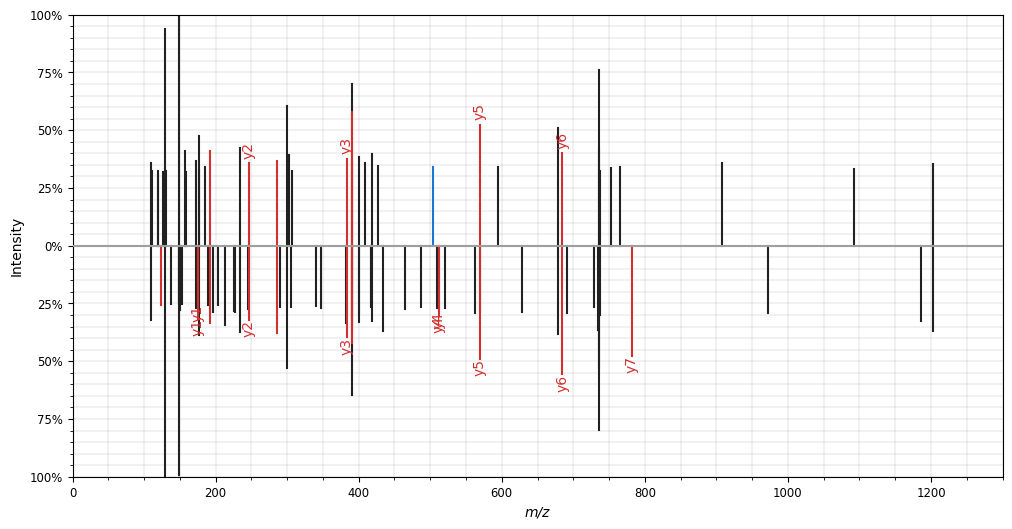

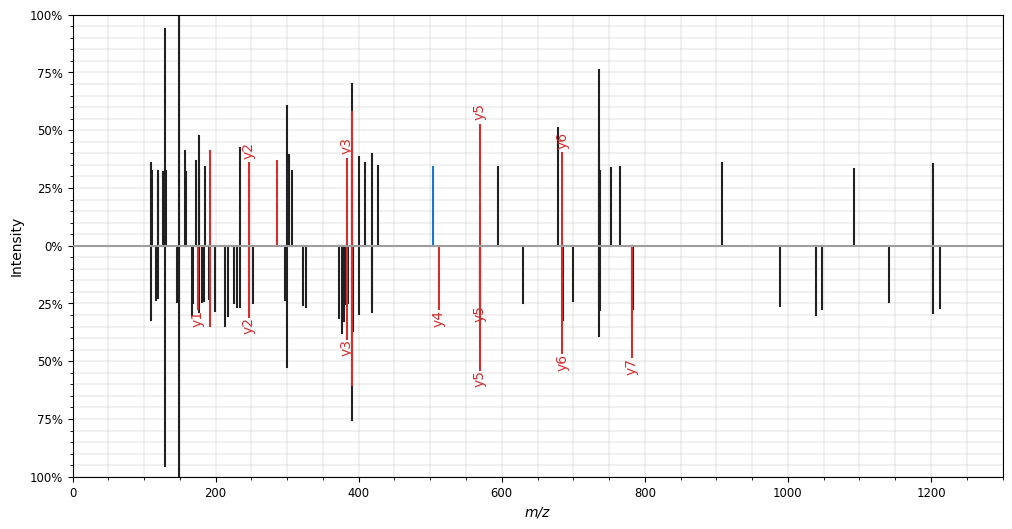

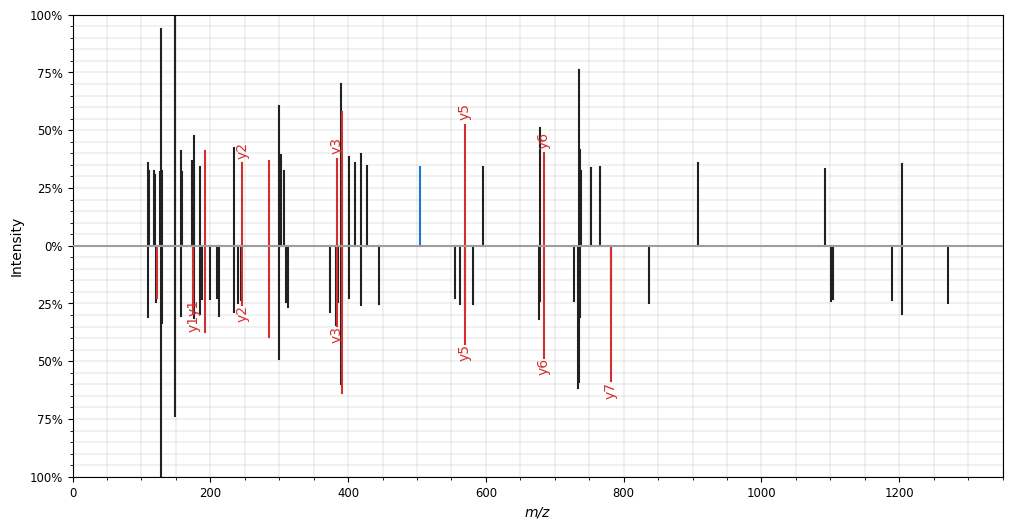

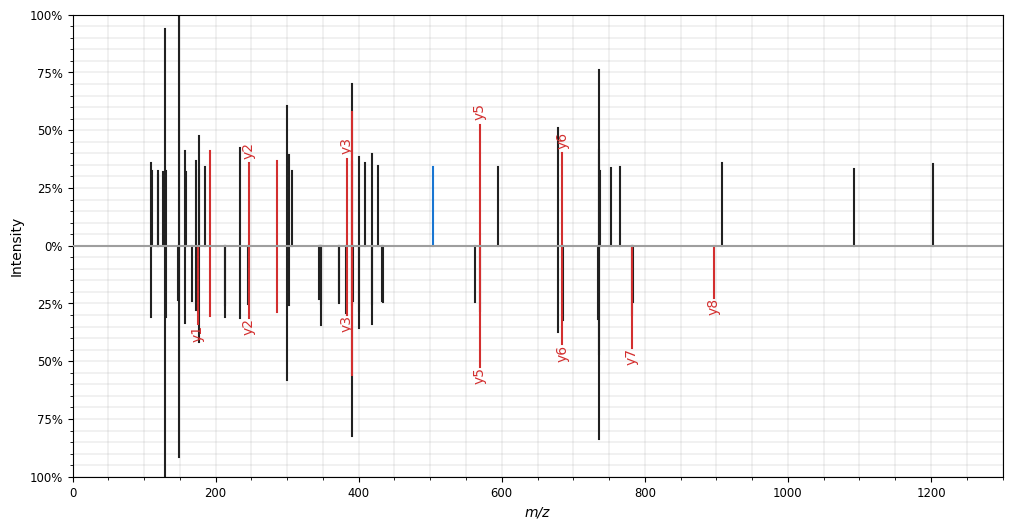

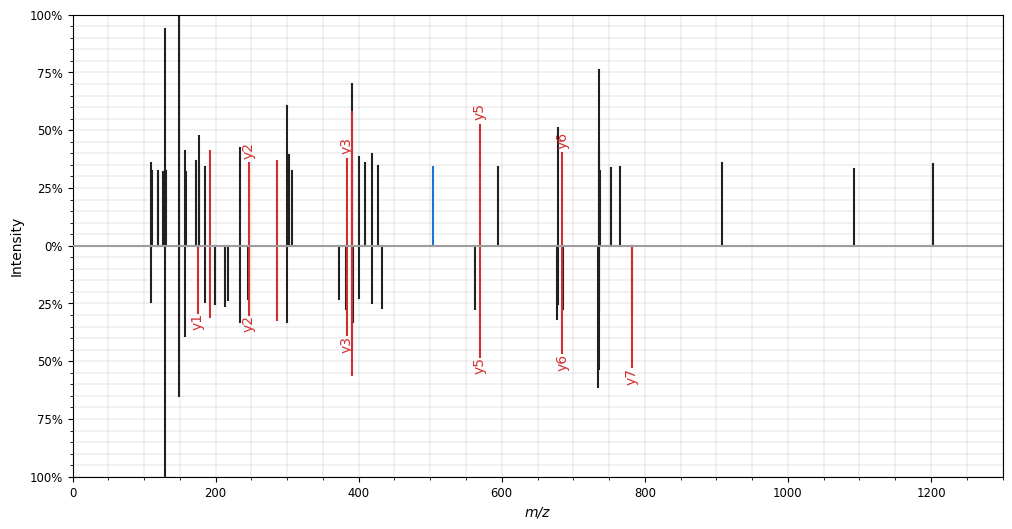

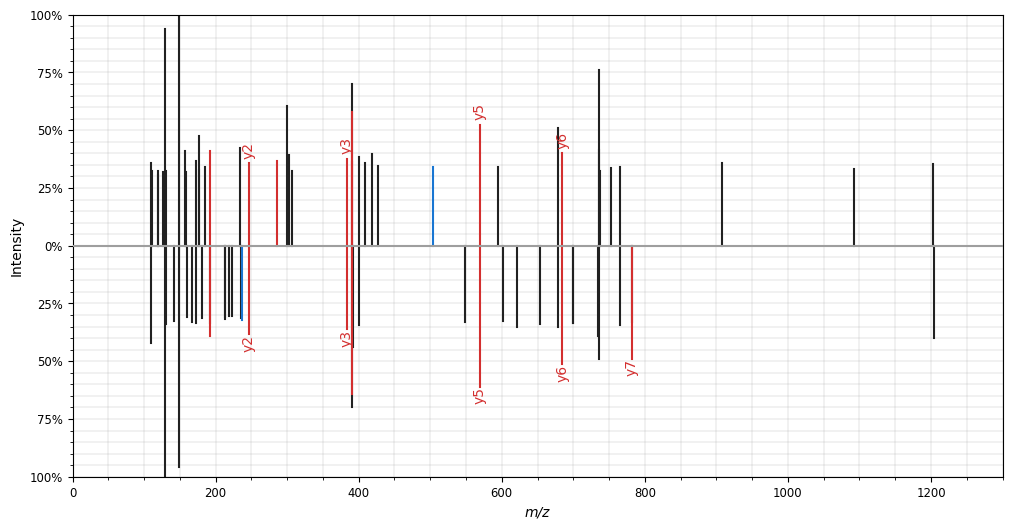

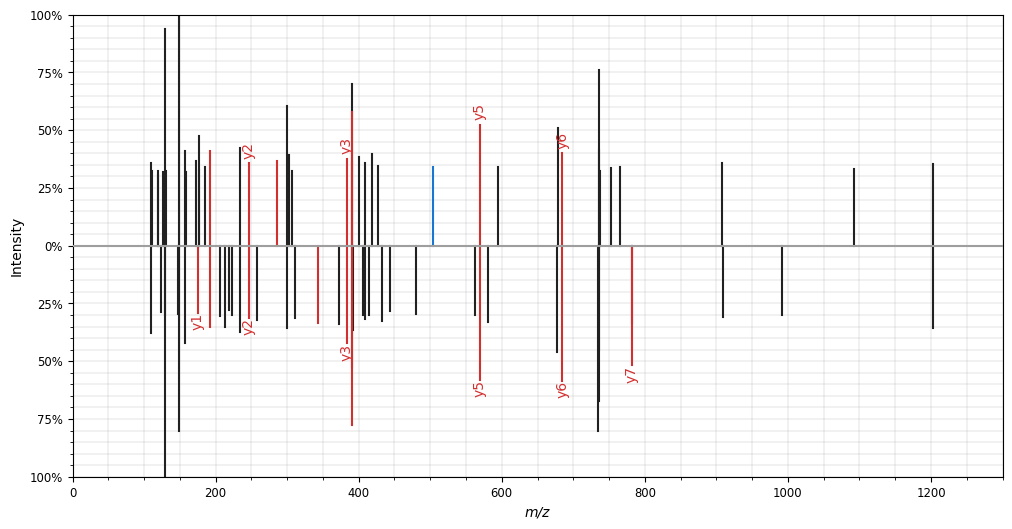

In [34]:
# VKEDPDGEHAR
comparison_scan = file1_scans[file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'VKEDPDGEHAR', 'Chimeric Index'][0]].scan_num
for peptide, scan, df_num in file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'VKEDPDGEHAR', ['Peptide', 'Alt Scan Num', 'Data Frame Num']].values :
    mirror_plot(file1_scans_file_name, comparison_scan, fixed_titles[df_num], scan, peptide)

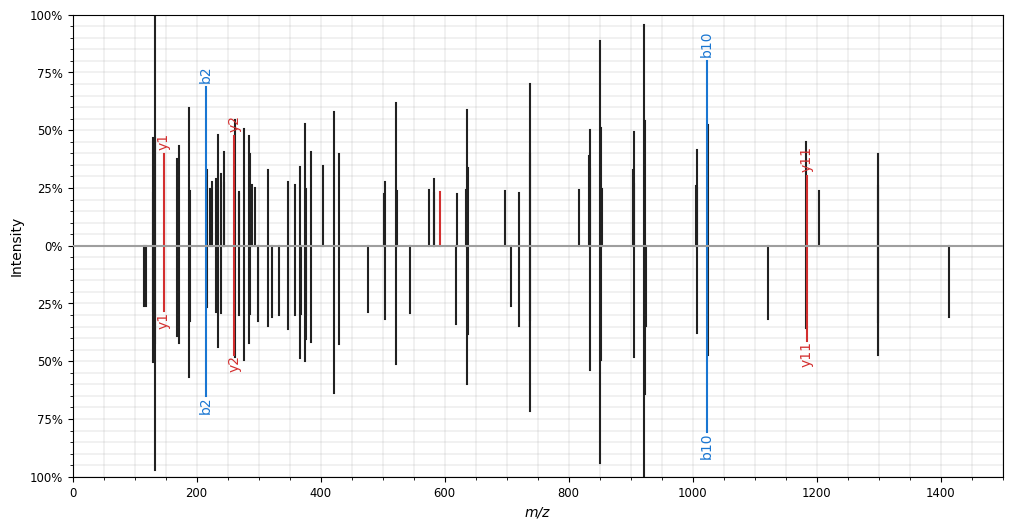

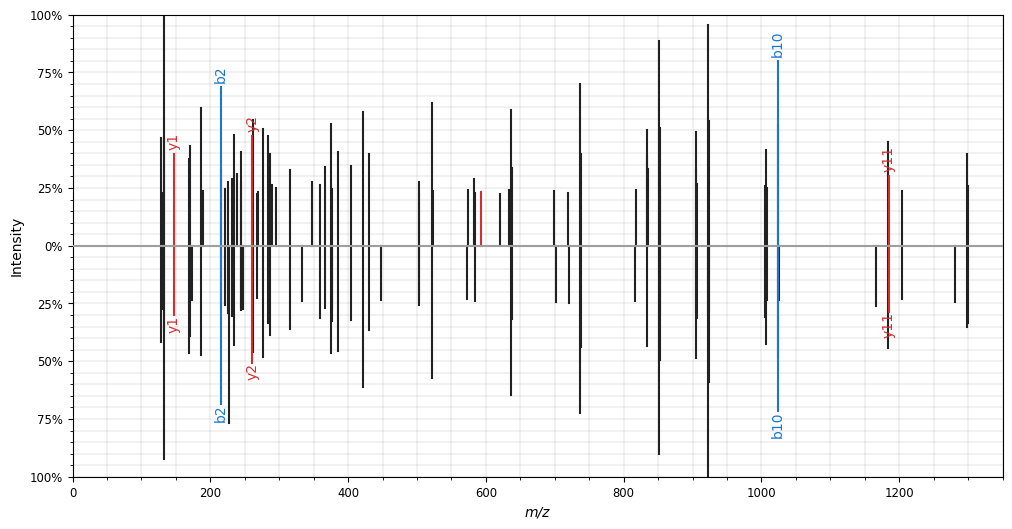

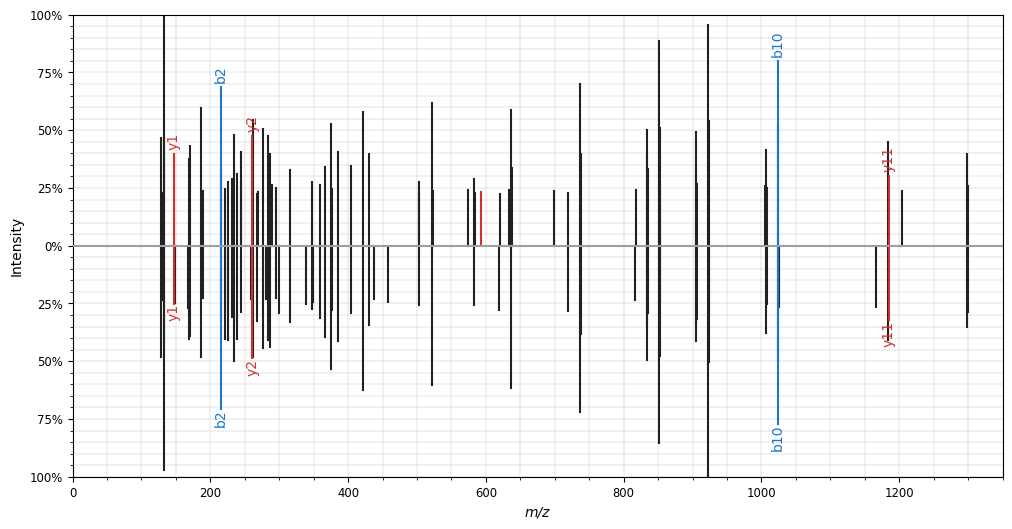

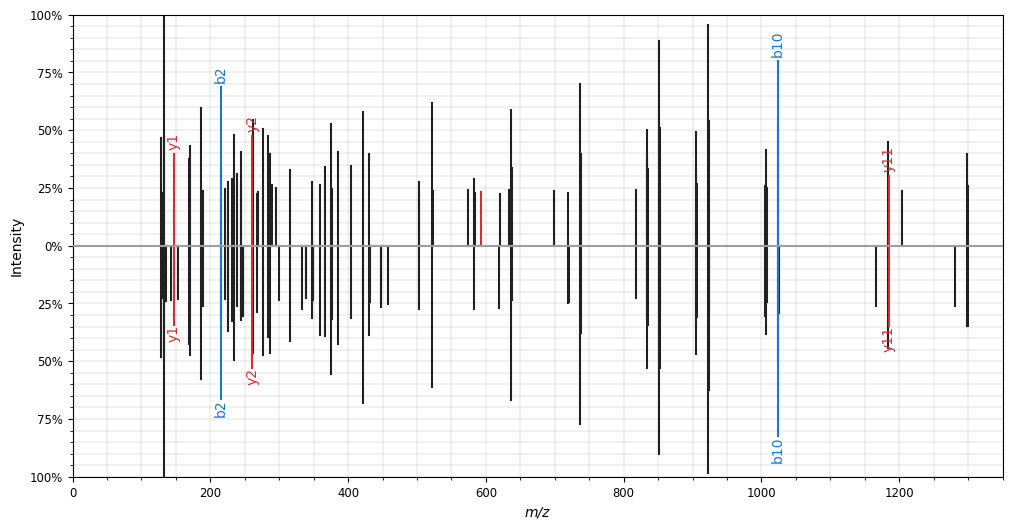

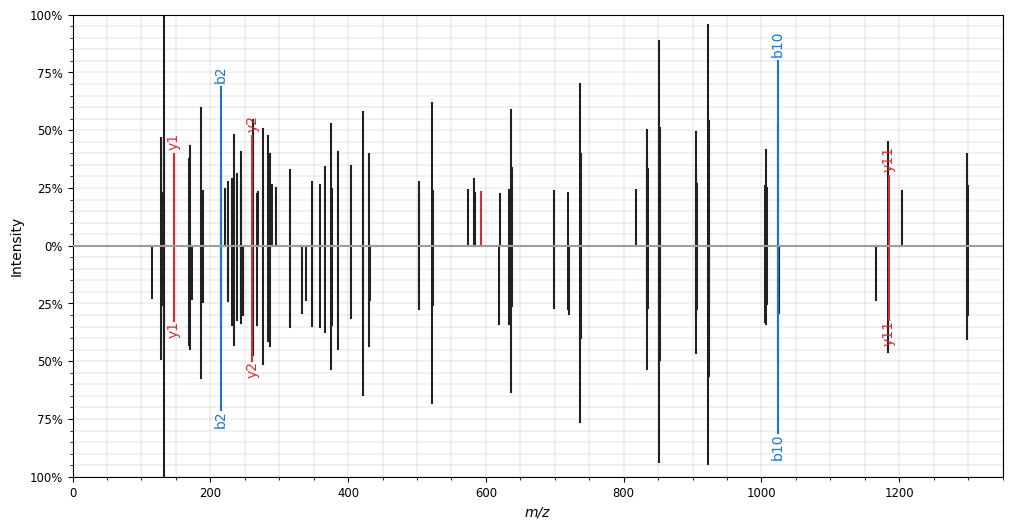

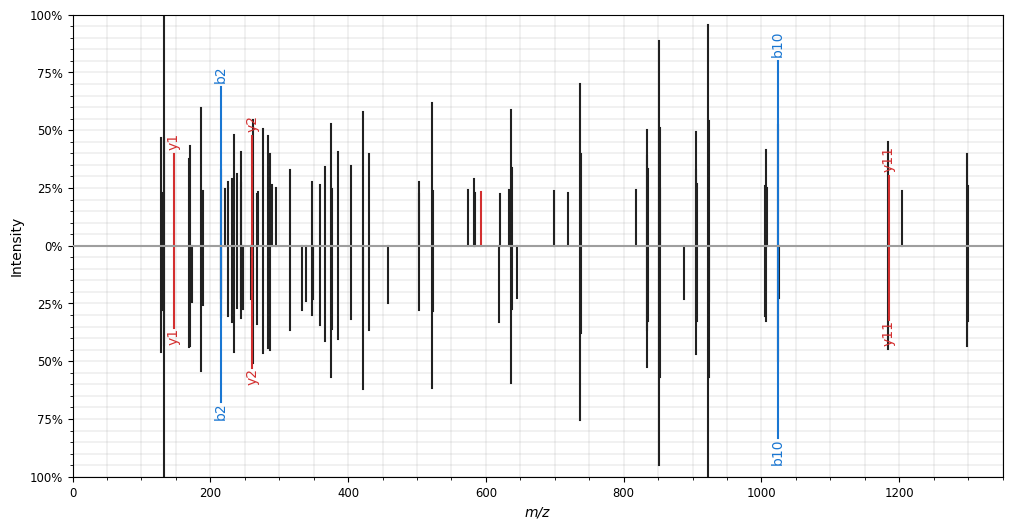

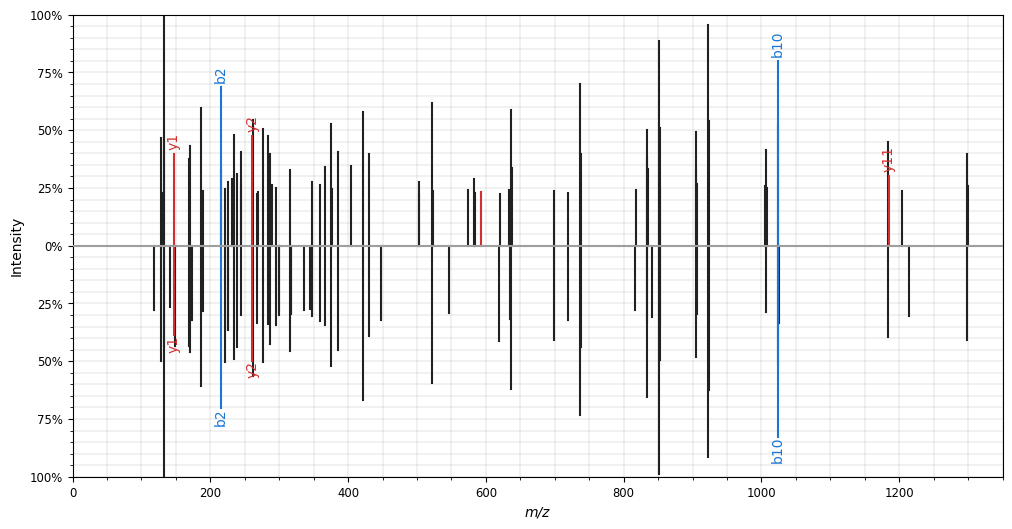

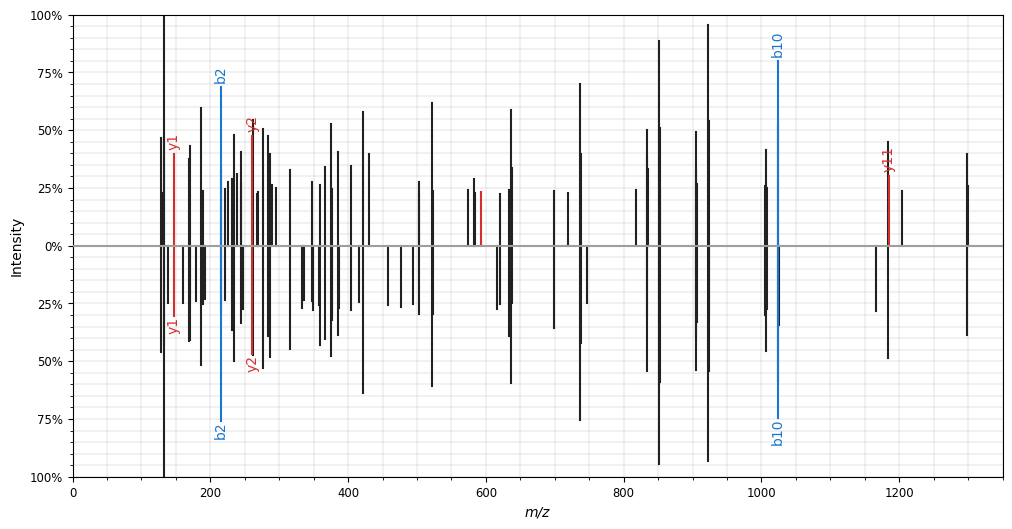

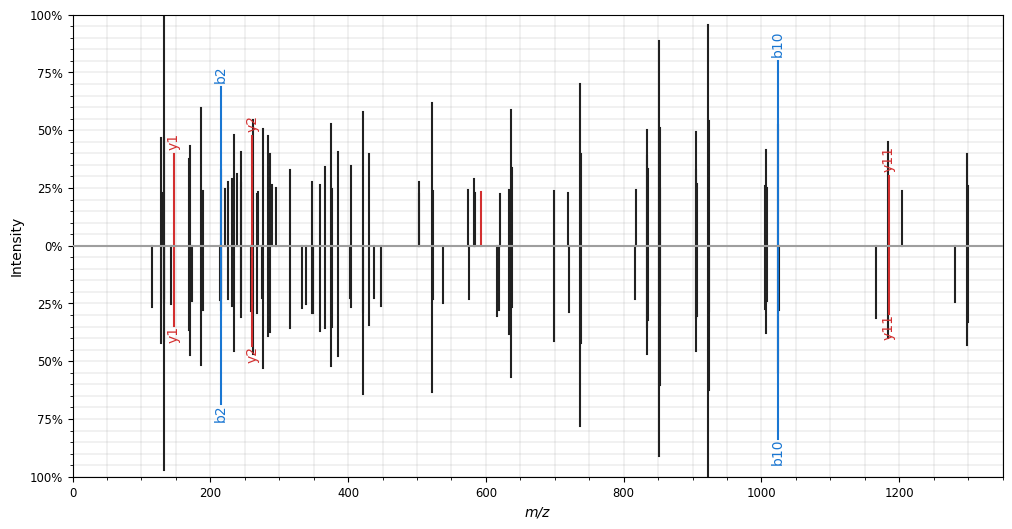

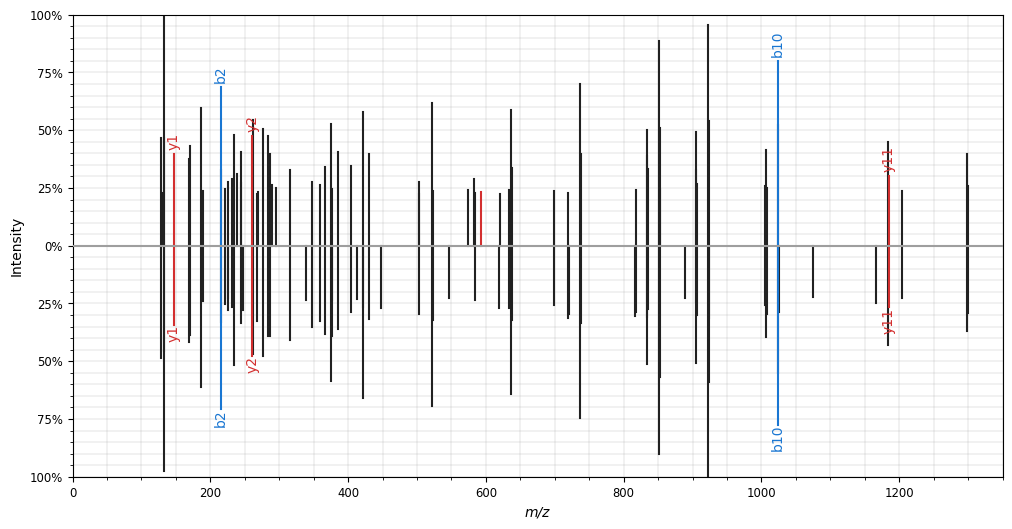

In [58]:
comparison_scan = file1_scans[file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'VDCTANTNTCNK', 'Chimeric Index'].iloc[0]].scan_num
for peptide, scan, df_num in file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'VDCTANTNTCNK', ['Peptide', 'Alt Scan Num', 'Data Frame Num']].values :
    mirror_plot(file1_scans_file_name, comparison_scan, fixed_titles[df_num], scan, peptide)

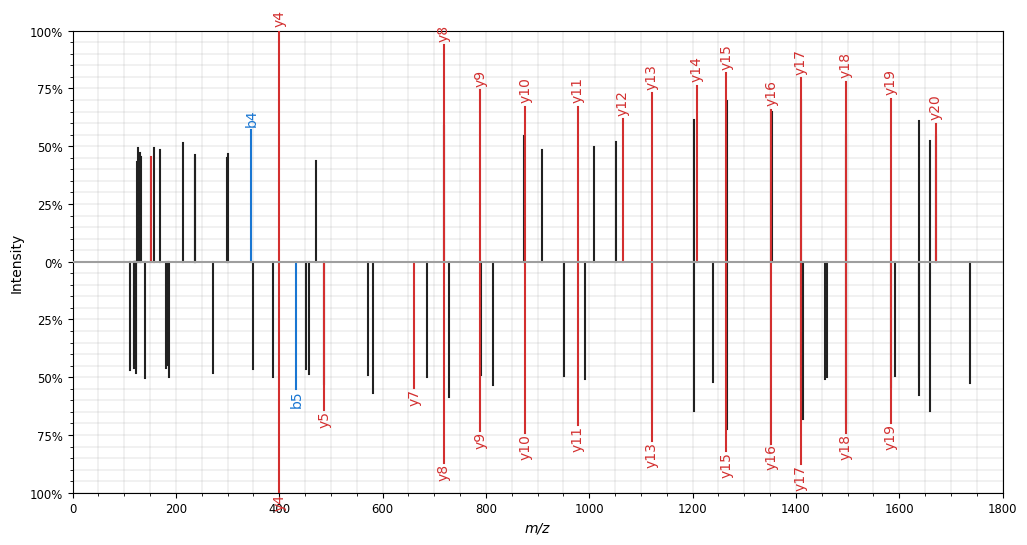

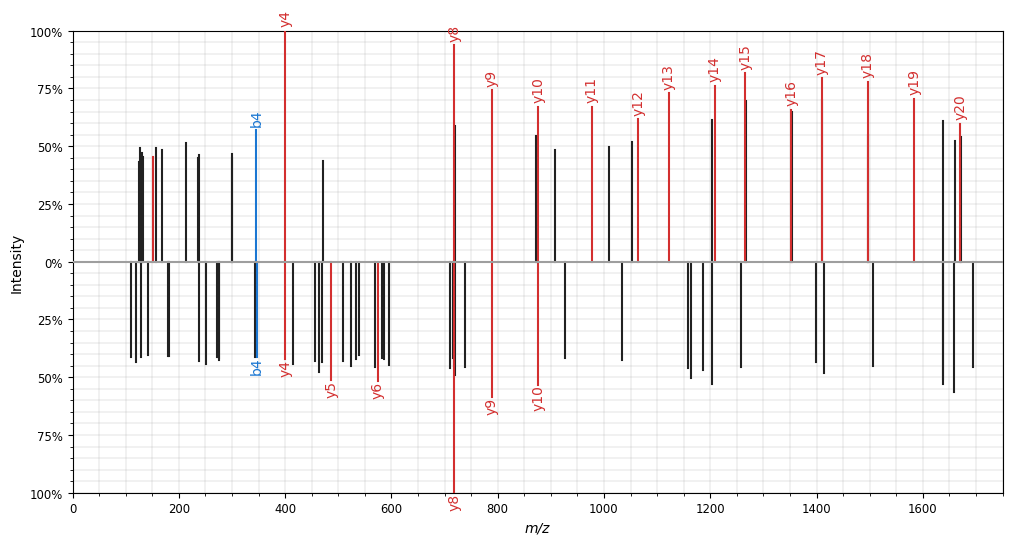

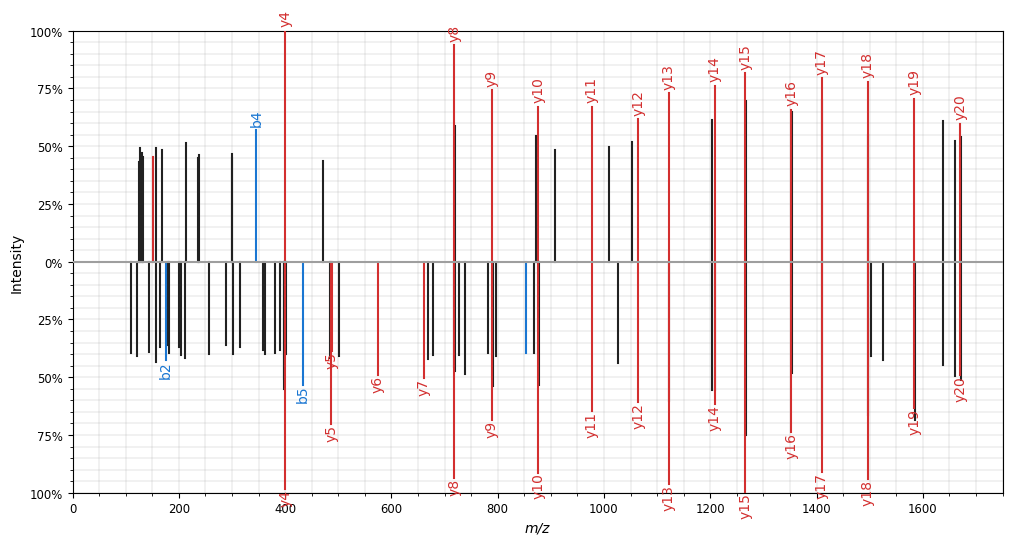

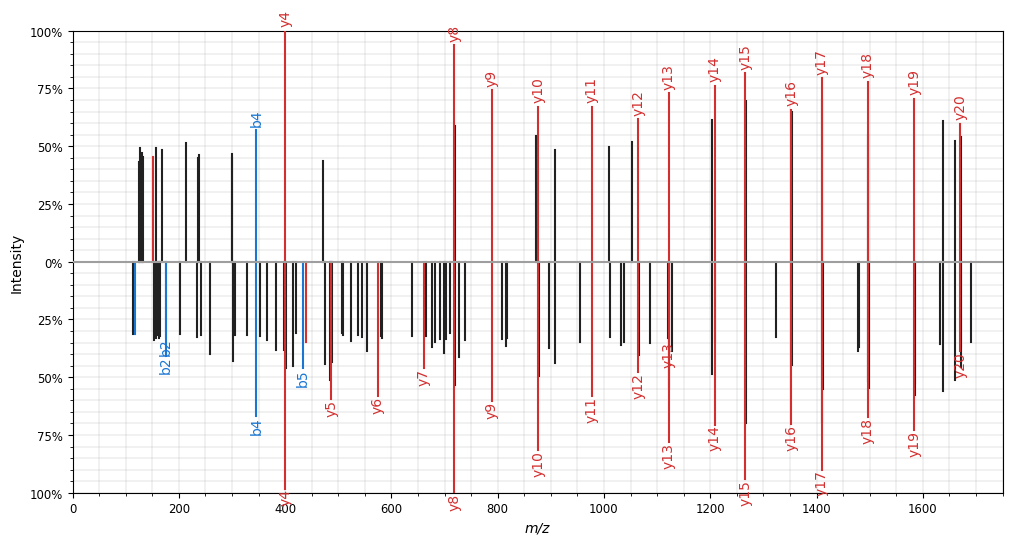

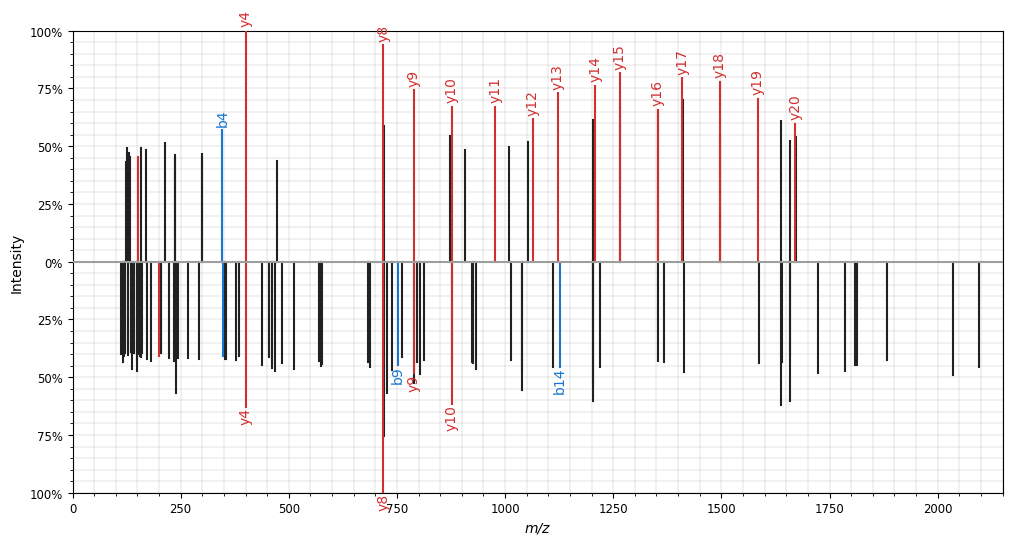

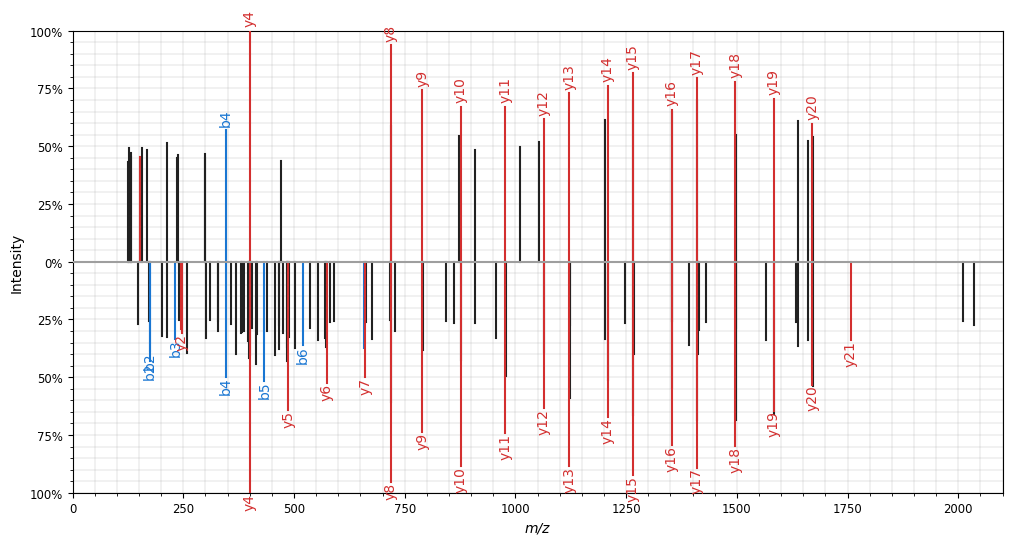

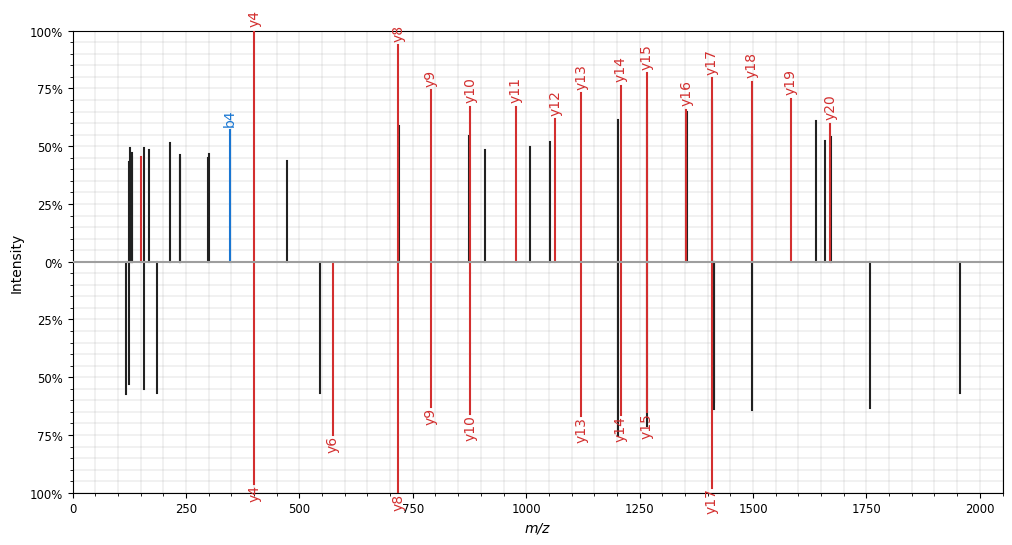

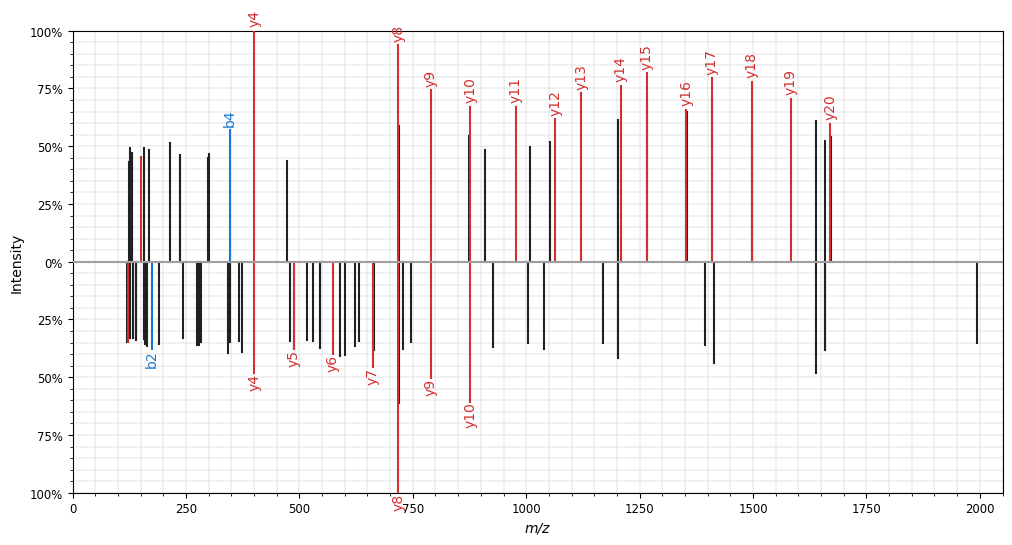

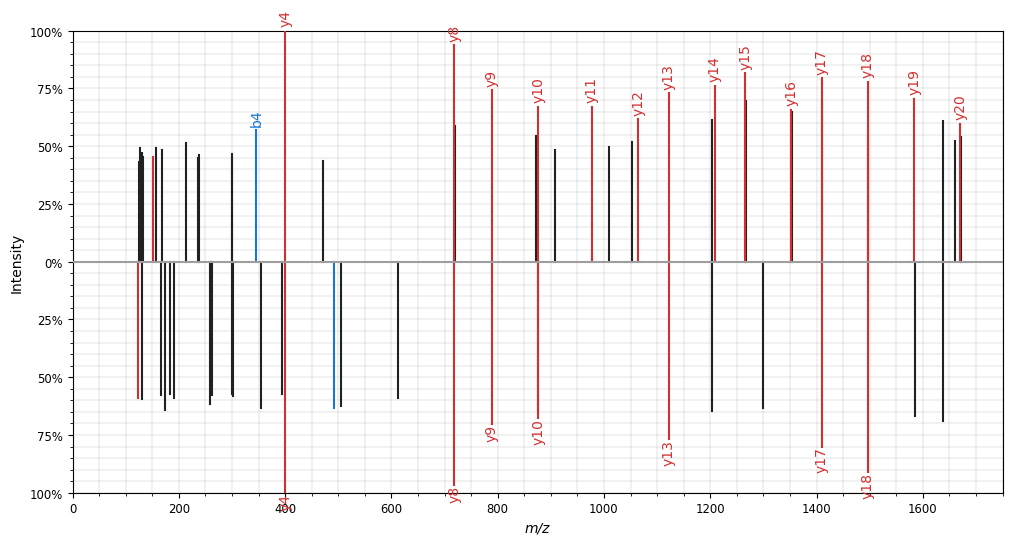

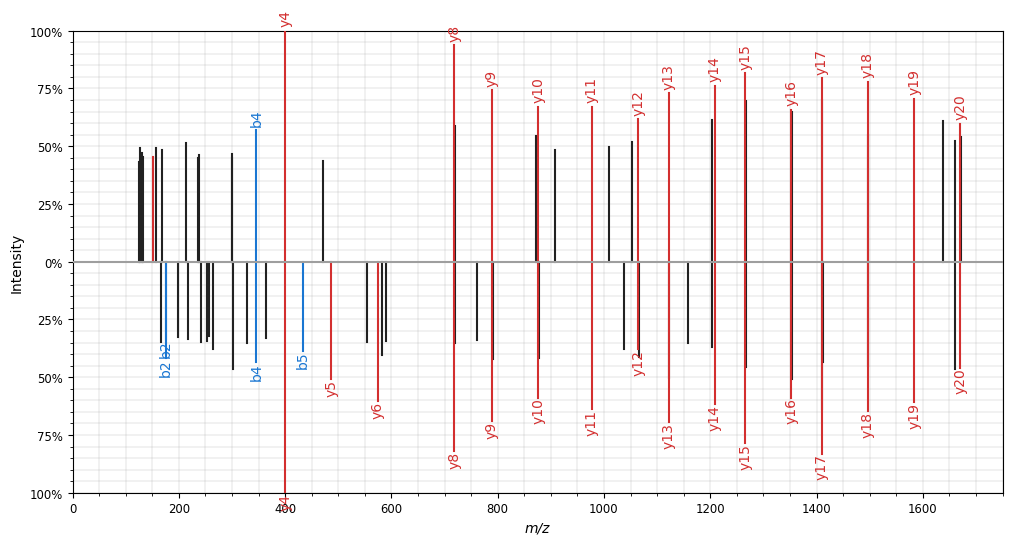

In [49]:
comparison_scan = file1_scans[file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'SSGNSSSSGSGSGSTSAGSSSPGAR', 'Chimeric Index'].iloc[0]].scan_num
for peptide, scan, df_num in file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'SSGNSSSSGSGSGSTSAGSSSPGAR', ['Peptide', 'Alt Scan Num', 'Data Frame Num']].values :
    mirror_plot(file1_scans_file_name, comparison_scan, fixed_titles[df_num], scan, peptide)

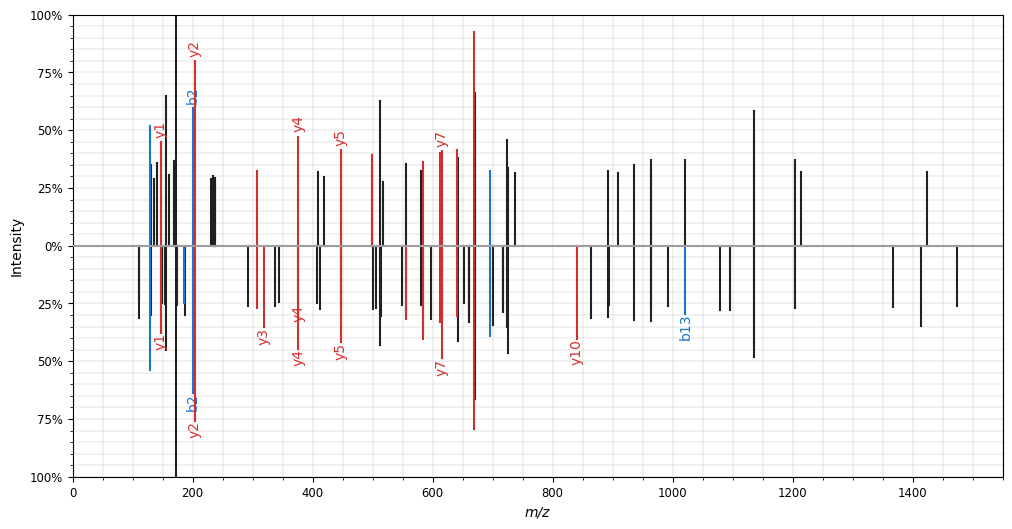

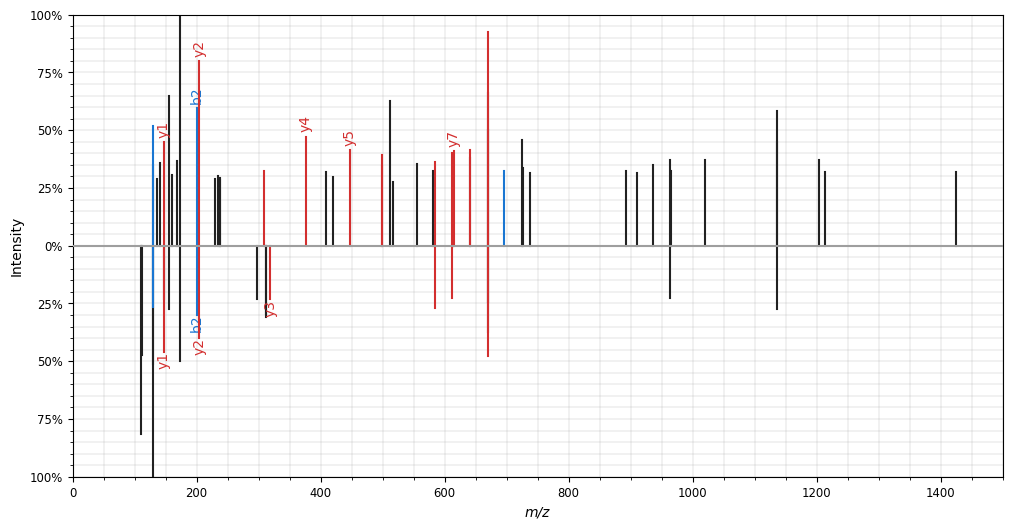

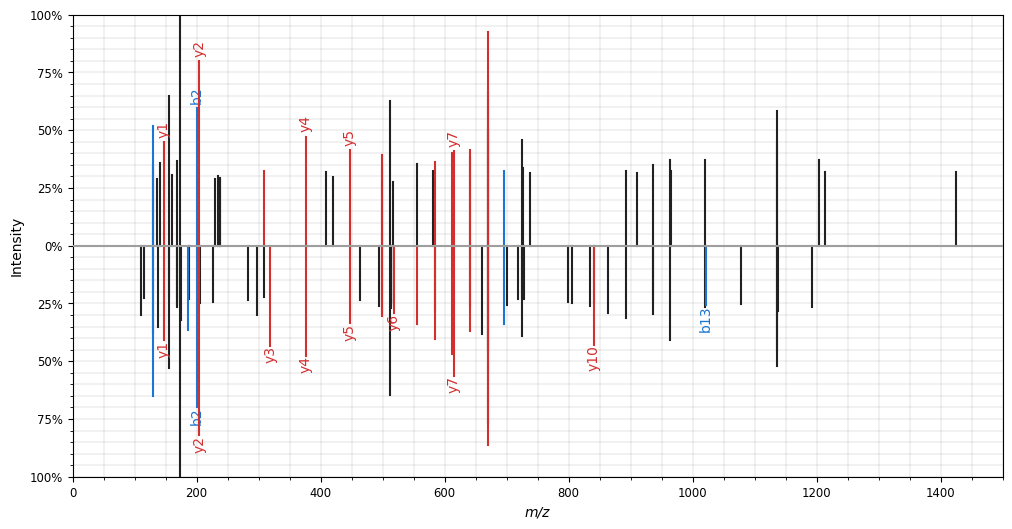

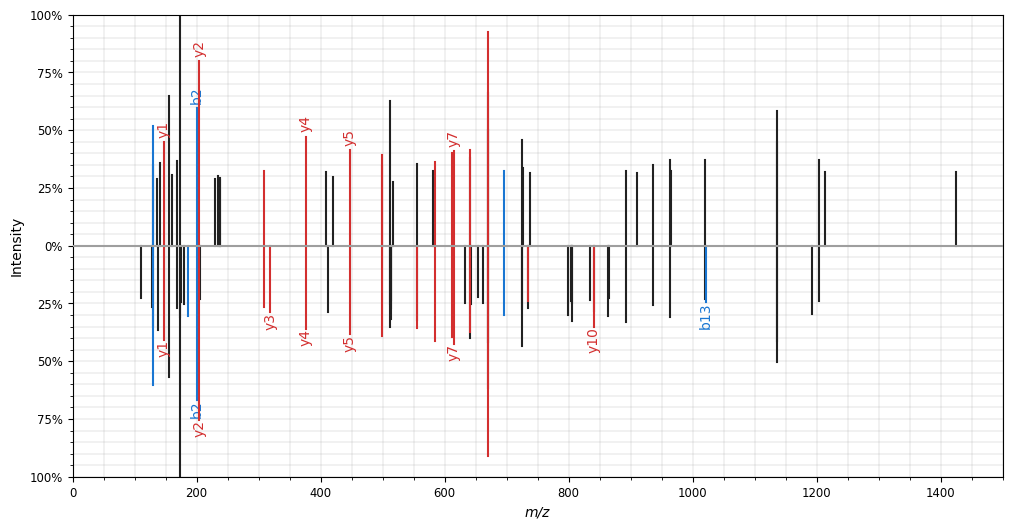

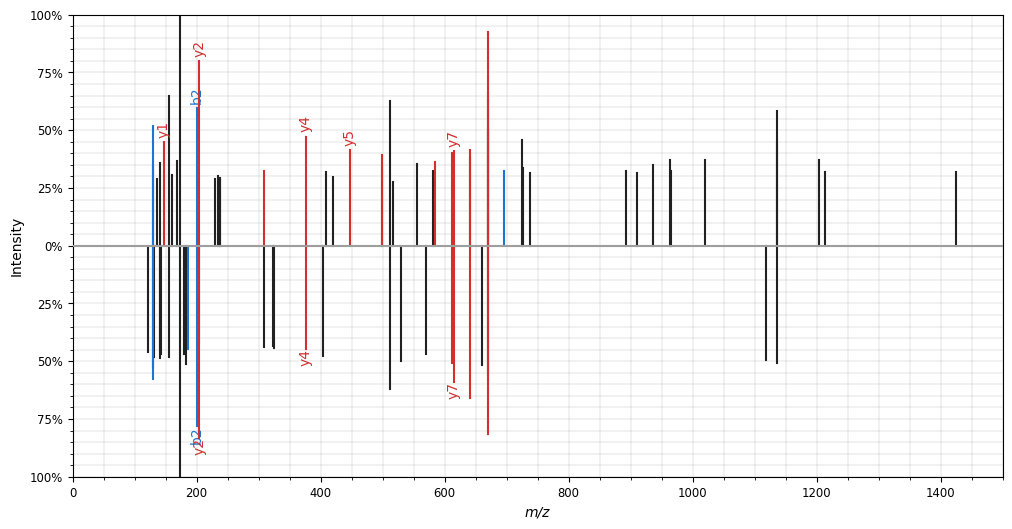

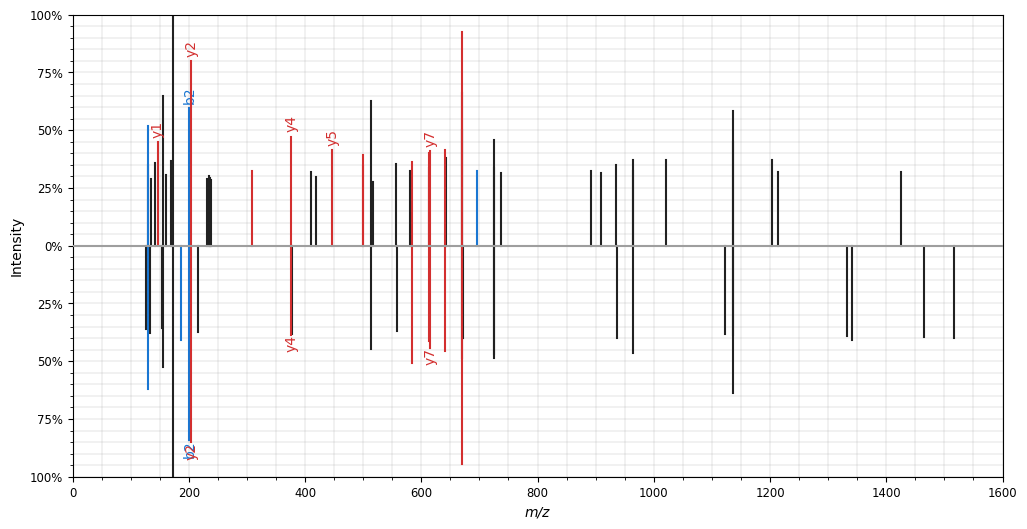

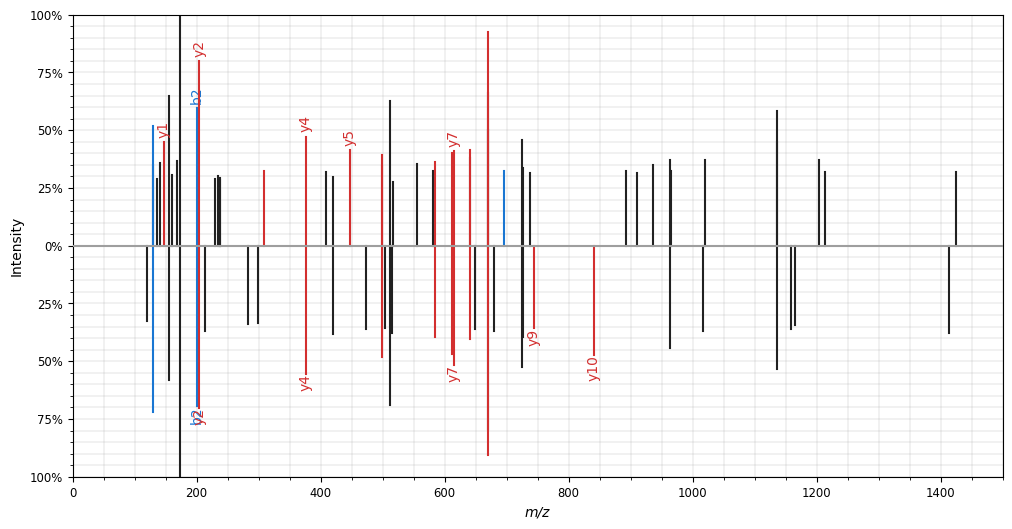

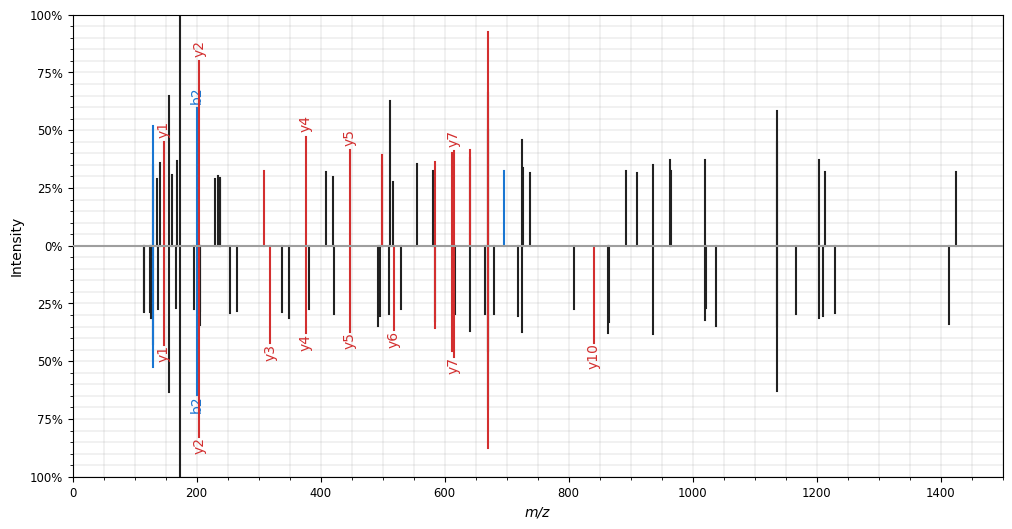

In [53]:
comparison_scan = file1_scans[file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'AEGGGGGGRPGAPAAGDGK', 'Chimeric Index'].iloc[0]].scan_num
for peptide, scan, df_num in file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'AEGGGGGGRPGAPAAGDGK', ['Peptide', 'Alt Scan Num', 'Data Frame Num']].values :
    mirror_plot(file1_scans_file_name, comparison_scan, fixed_titles[df_num], scan, peptide)

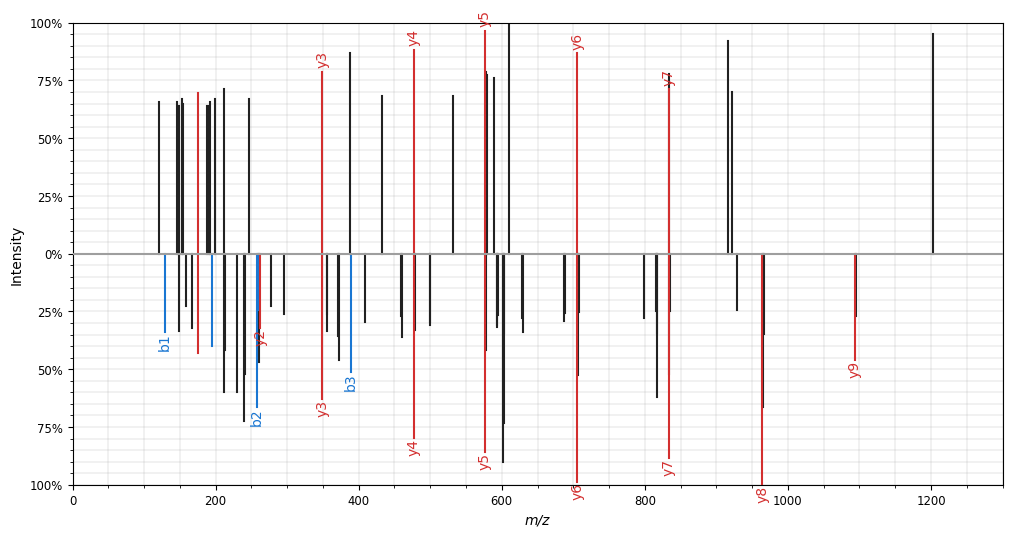

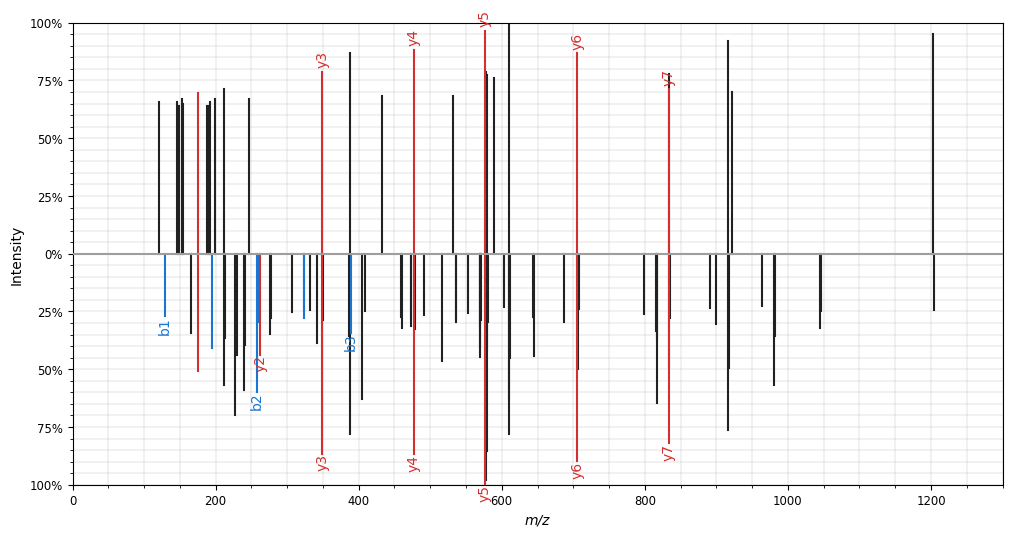

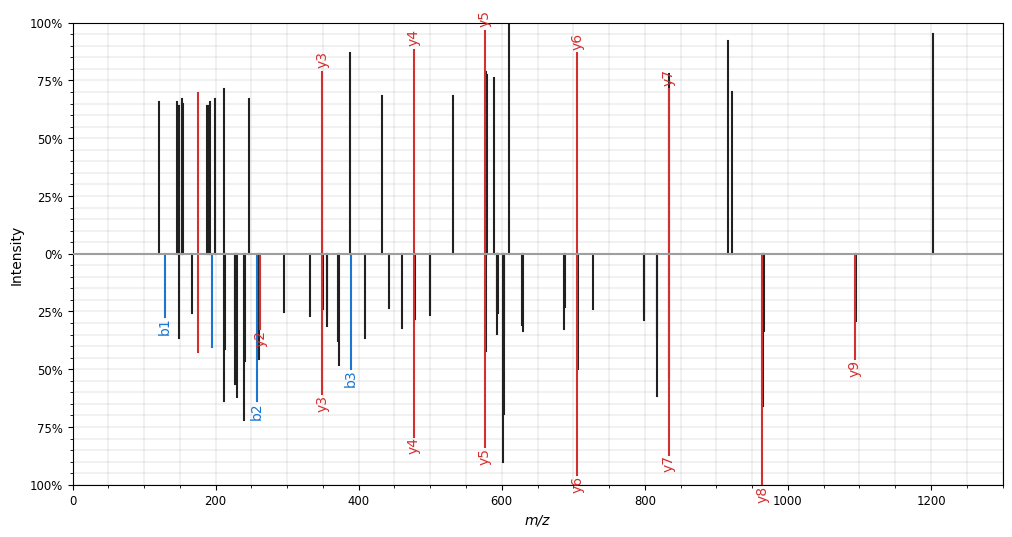

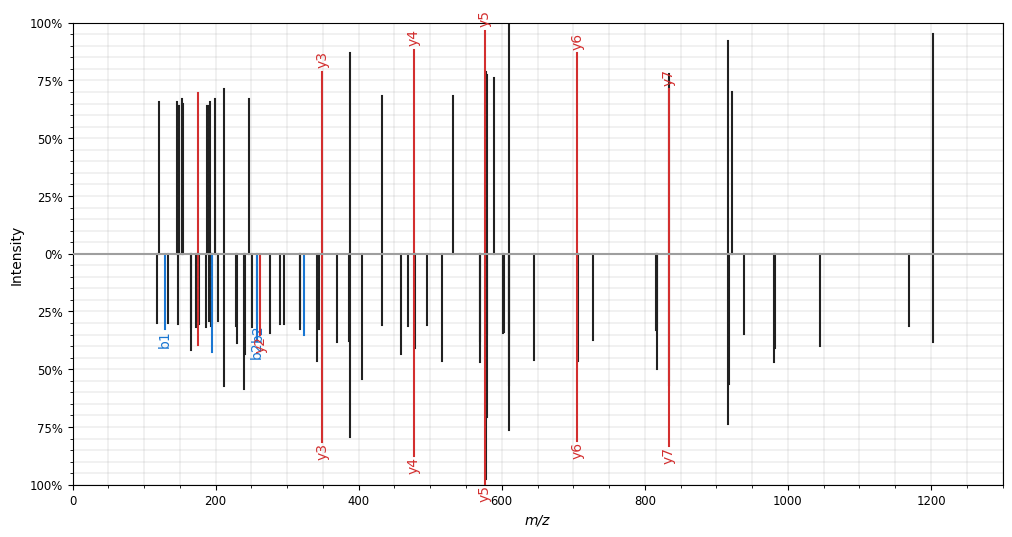

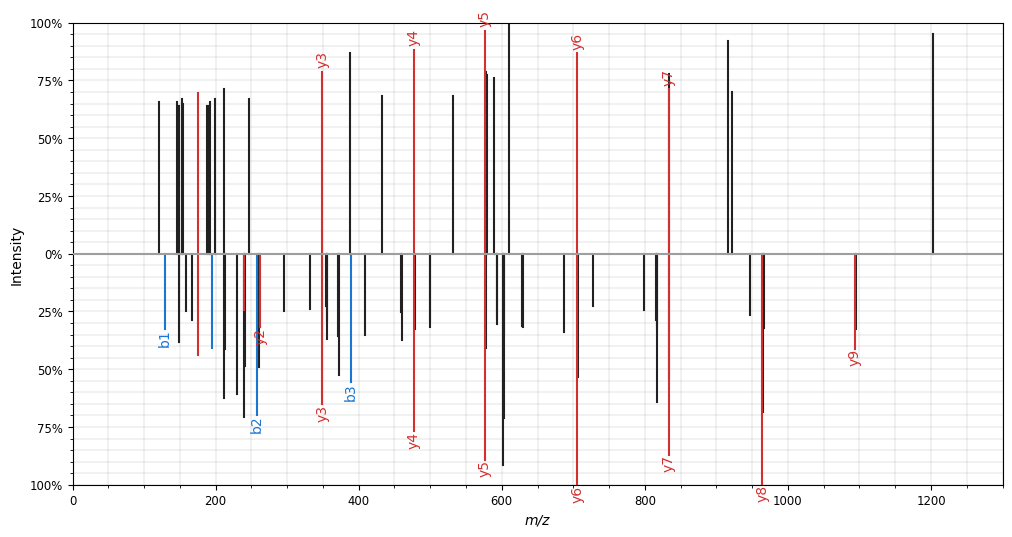

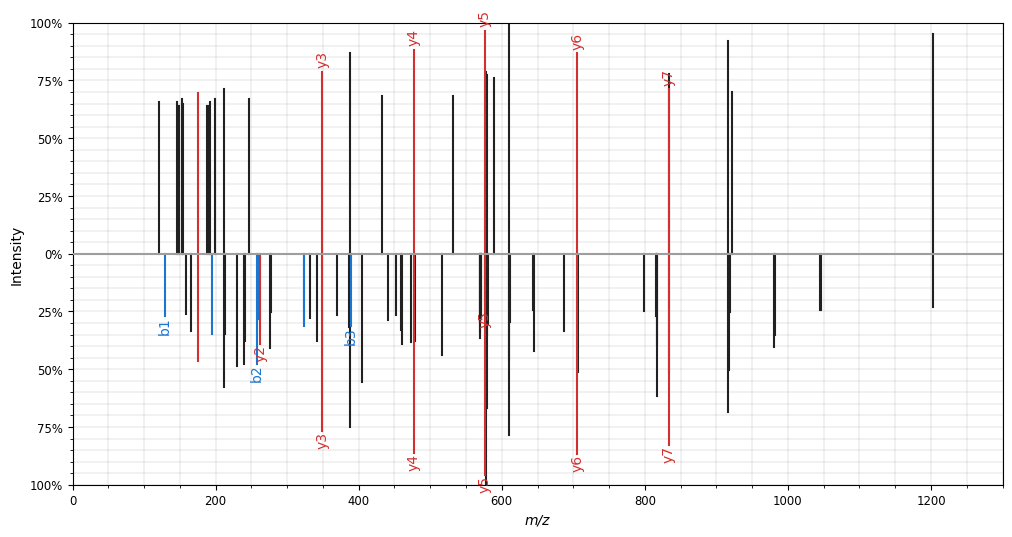

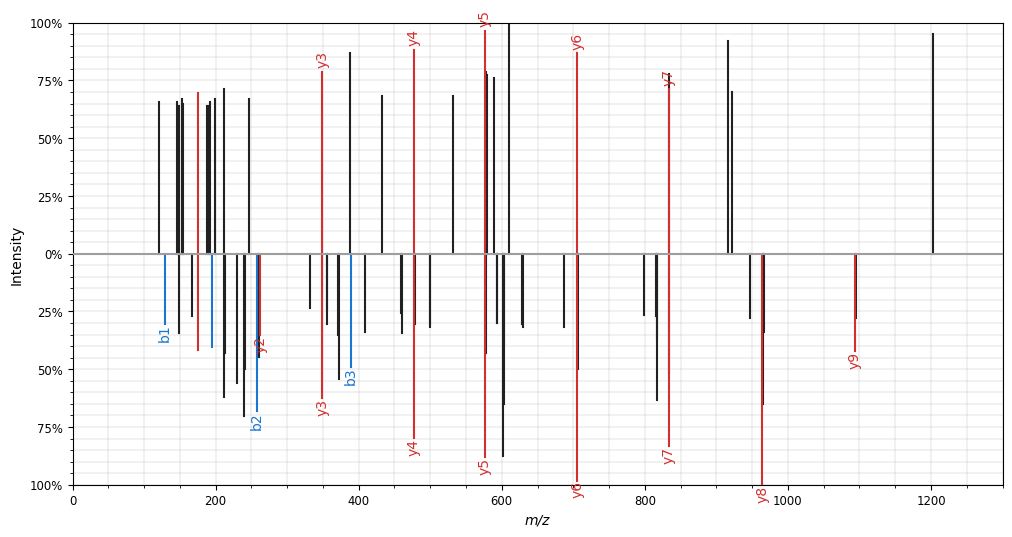

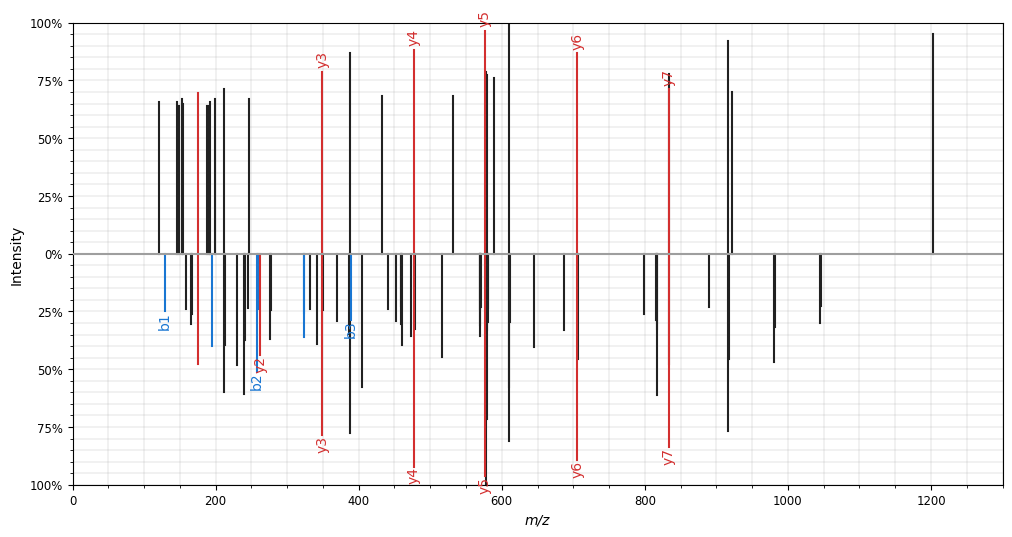

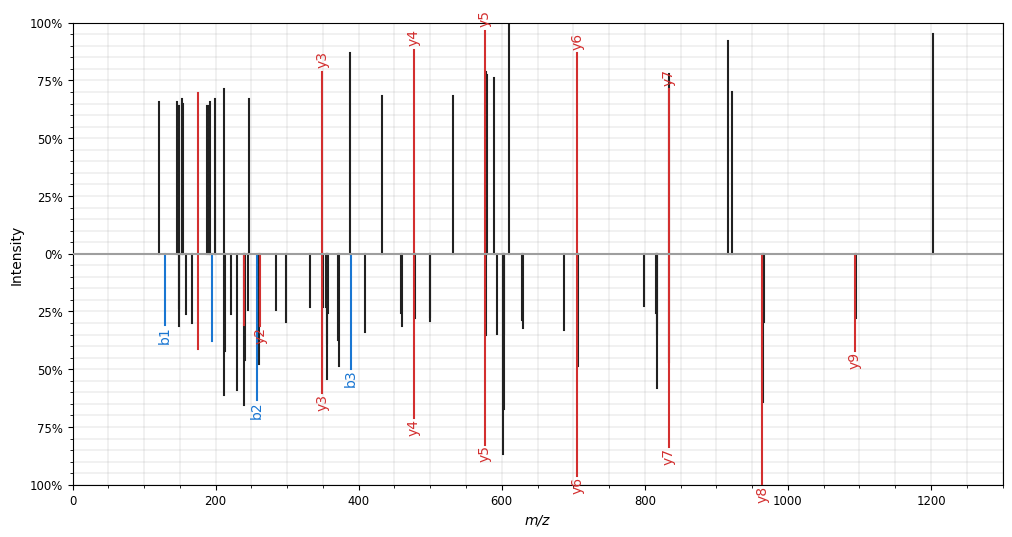

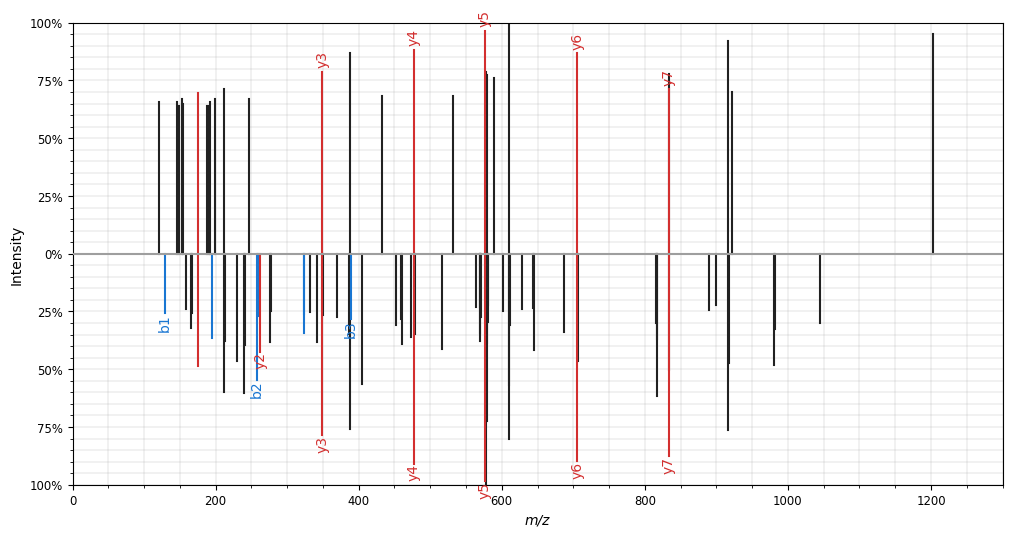

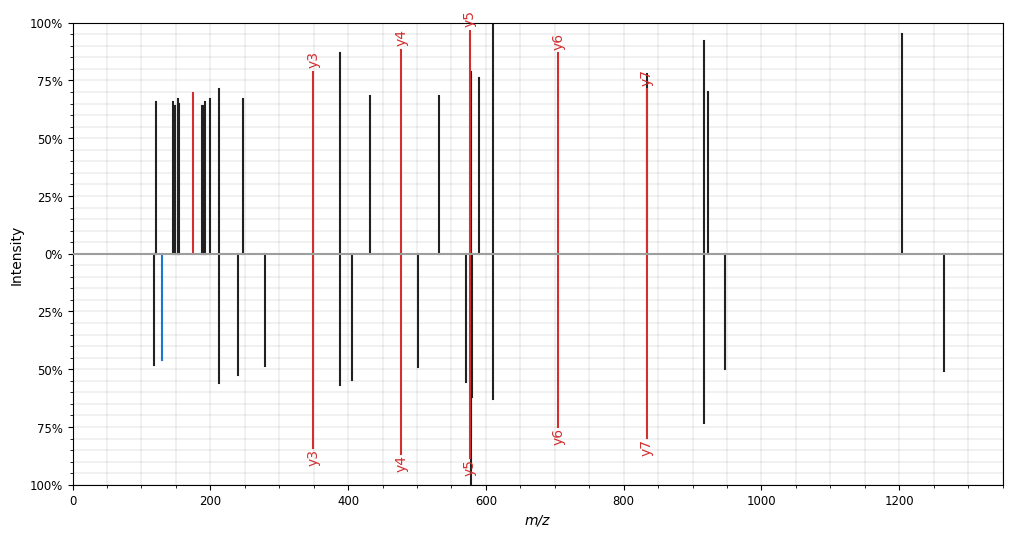

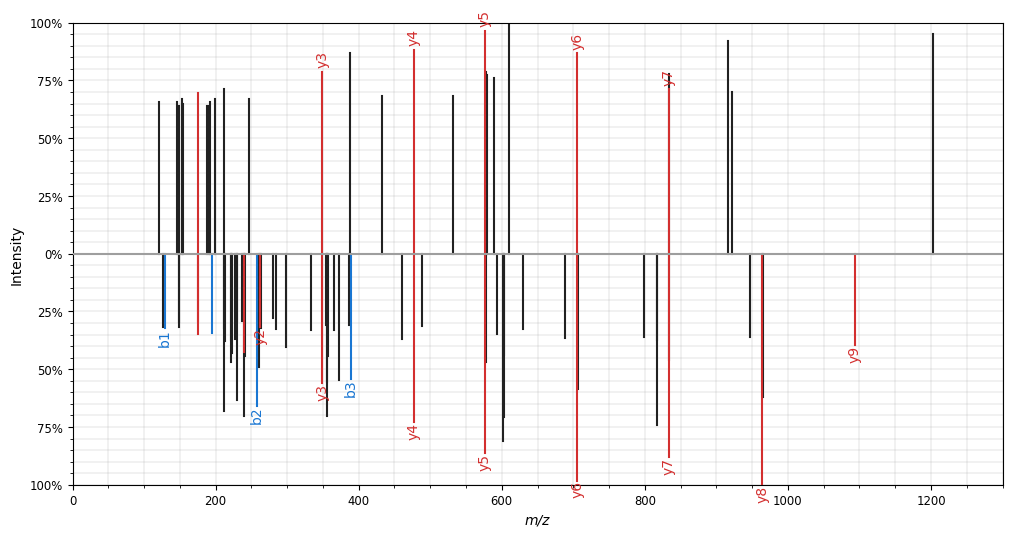

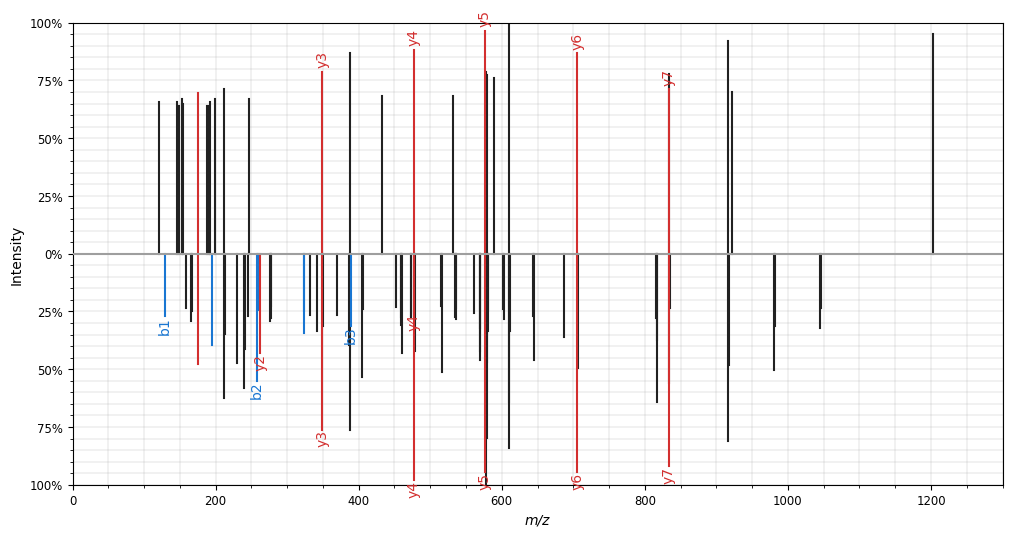

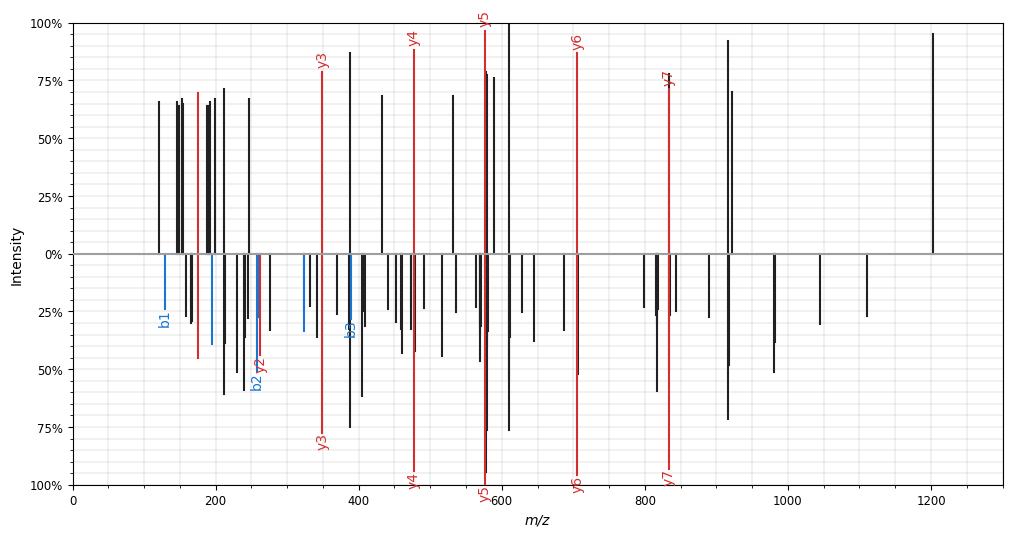

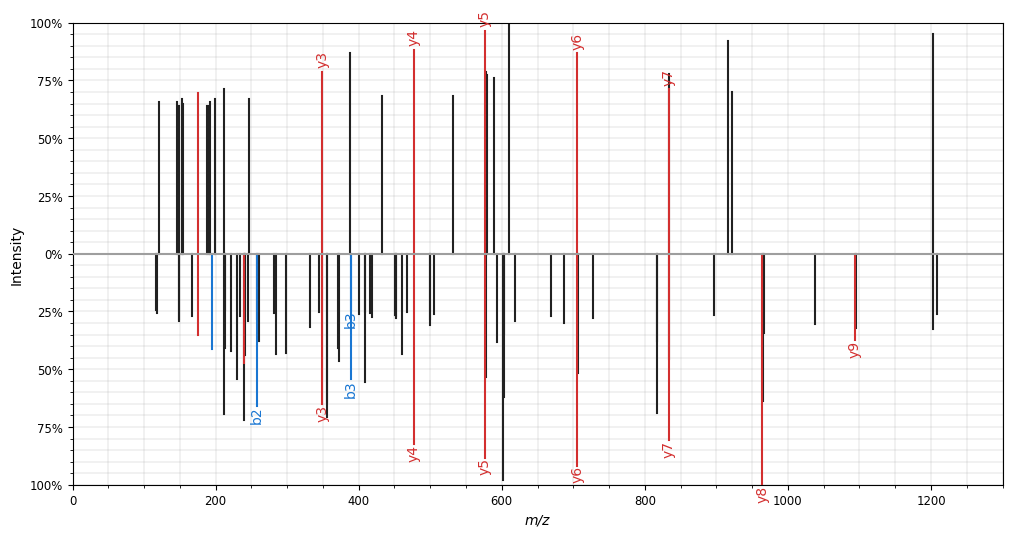

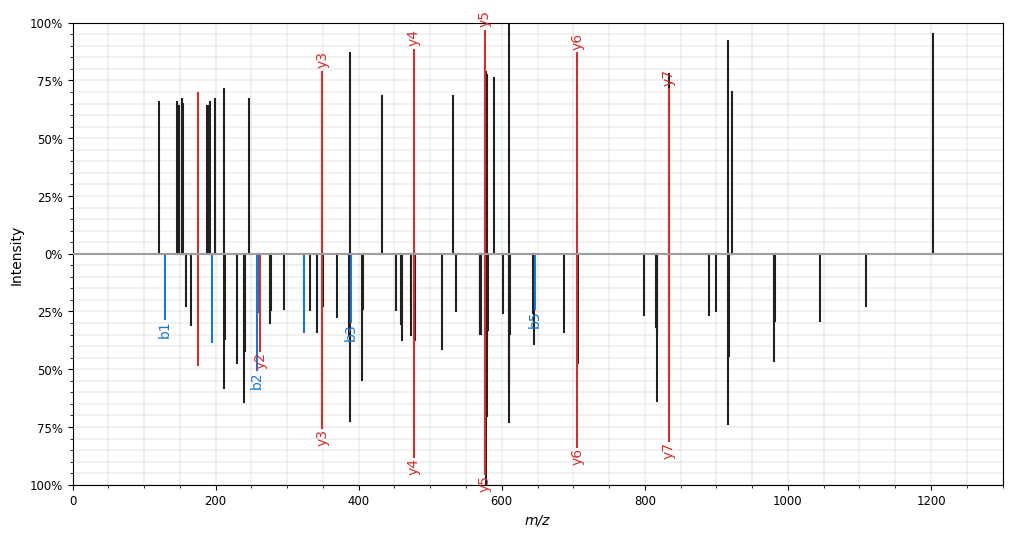

In [55]:
comparison_scan = file1_scans[file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'QEMQEVQSSR', 'Chimeric Index'].iloc[0]].scan_num
for peptide, scan, df_num in file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'QEMQEVQSSR', ['Peptide', 'Alt Scan Num', 'Data Frame Num']].values :
    mirror_plot(file1_scans_file_name, comparison_scan, fixed_titles[df_num], scan, peptide)

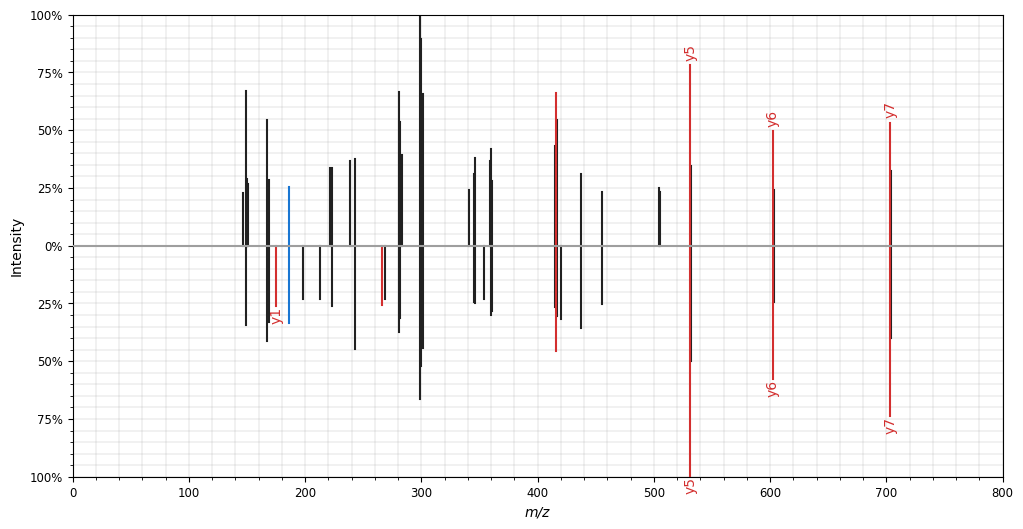

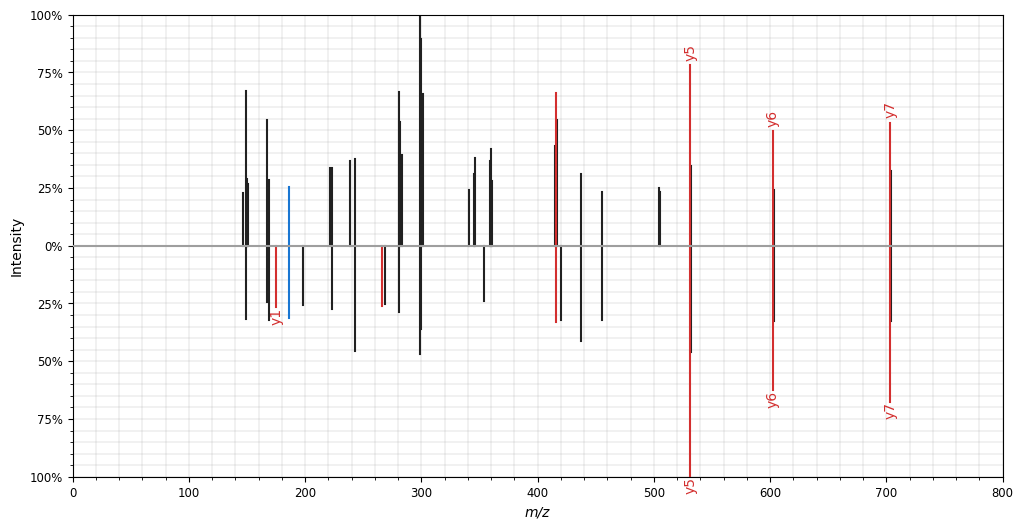

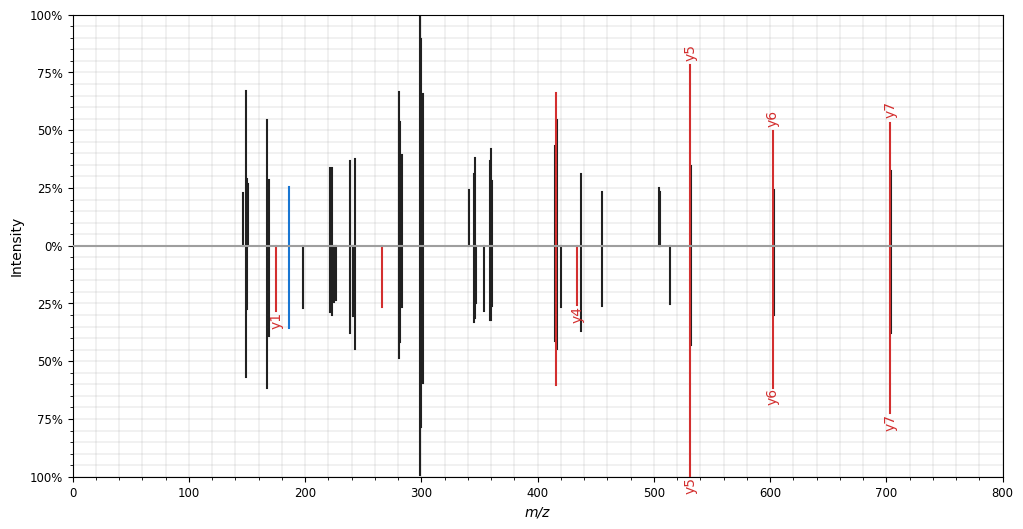

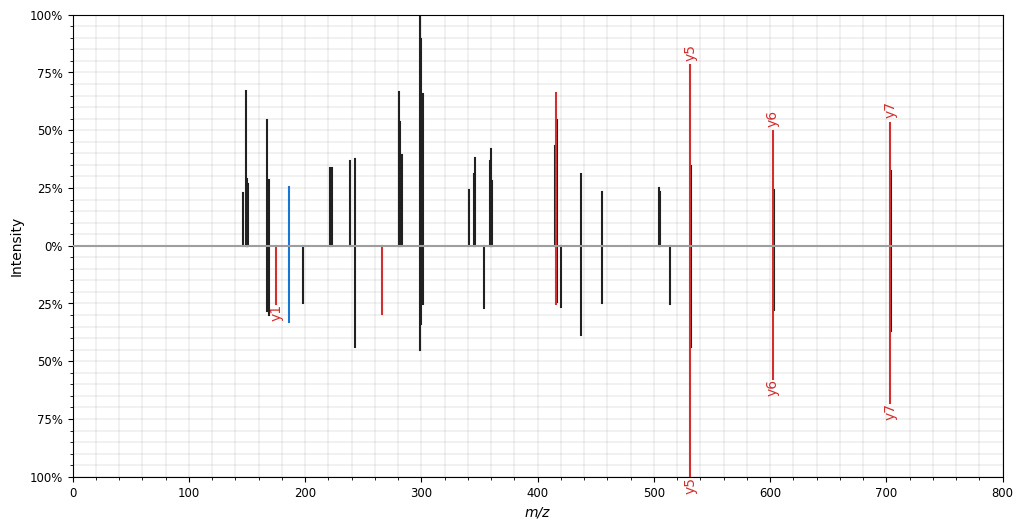

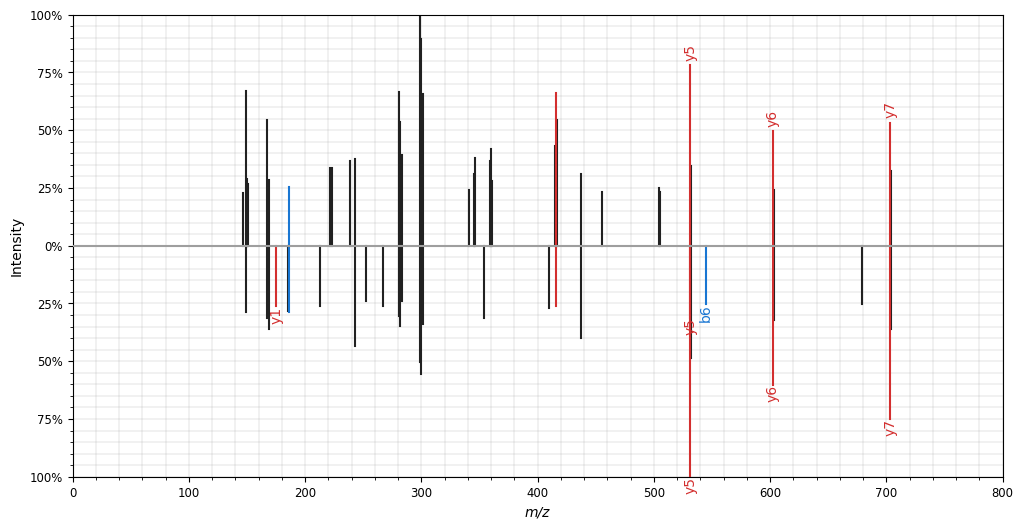

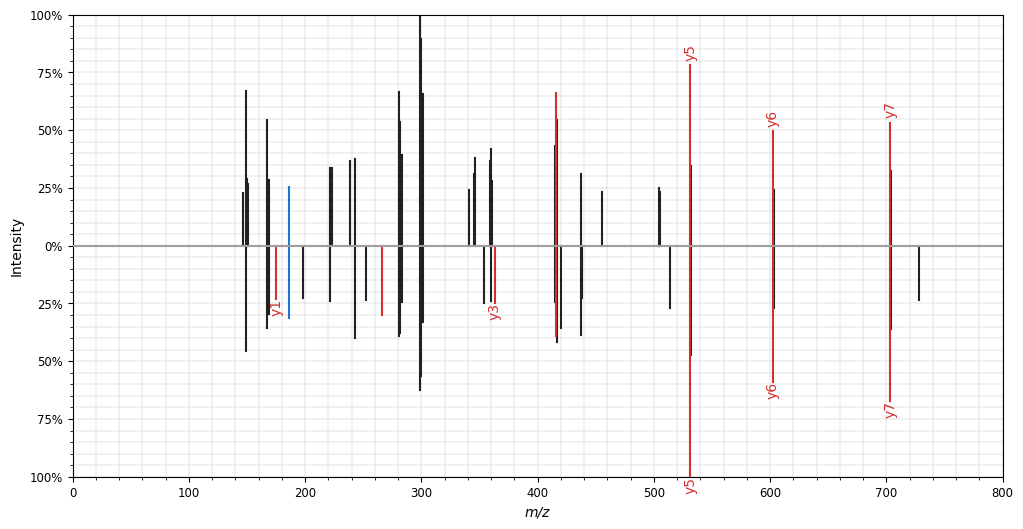

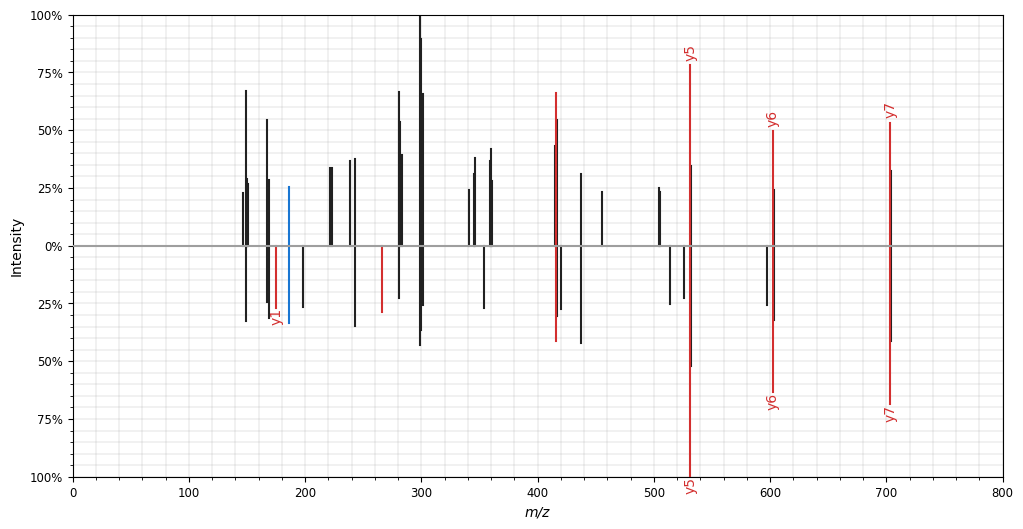

In [42]:
comparison_scan = file1_scans[file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'EGGQTAPASTR', 'Chimeric Index'].iloc[0]].scan_num
for peptide, scan, df_num in file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'EGGQTAPASTR', ['Peptide', 'Alt Scan Num', 'Data Frame Num']].values :
    mirror_plot(file1_scans_file_name, comparison_scan, fixed_titles[df_num], scan, peptide)

In [7]:
for peptide, scan, df_num in file1_alt_scans_info.loc[file1_alt_scans_info['Peptide'] == 'VKEDPDGEHAR', ['Peptide', 'Alt Scan Num', 'Data Frame Num']].values :
    Visualize_MS2(fixed_titles[df_num], scan, peptide = peptide)

In [ ]:
spectrum_utils.mirror_plot()

In [ ]:
# params
#  -> title
#  -> rtinseconds
#  -> pepmass -- (precursor m/z, intensity)
#  -> charge  -- precursor charge
# m/z array
# intensity array
# charge array

In [26]:
with mgf.read('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_1.mgf') as reader:
    for spectrum in reader:
        print(int(spectrum['params']['charge'][0]))

3
2
2
3
3
2
2
2
2
2
2
3
3
2
2
3
3
2
3
2
3
3
2
3
3
3
3
3
3
2
3
2
2
3
3
3
3
3
3
3
2
2
2
3
2
2
2
3
3
3
3
2
3
2
3
3
3
2
2
3
3
2
3
3
3
2
3
2
3
3
3
3
2
3
3
3
2
3
3
2
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
2
2
2
3
2
3
2
3
3
3
2
3
3
3
2
3
2
3
3
3
2
3
3
2
2
2
2
3
3
2
2
3
2
3
2
2
3
2
3
2
3
2
3
3
2
3
2
3
2
2
3
3
2
3
2
3
3
3
3
3
3
3
3
2
3
2
3
3
3
2
3
2
3
3
2
2
3
3
3
2
2
3
3
2
2
2
3
2
3
3
2
3
3
3
3
2
3
3
3
2
2
3
2
3
3
3
3
3
3
3
2
3
2
3
3
2
3
3
2
2
2
3
3
3
3
3
2
2
3
3
3
2
3
2
2
3
3
3
3
3
3
3
2
2
3
3
2
3
3
3
3
2
2
3
4
2
3
3
3
2
2
3
3
2
2
3
3
3
2
3
3
2
3
3
3
2
3
2
3
2
2
3
3
2
2
3
2
2
3
3
3
3
2
2
3
2
2
2
2
2
3
3
3
3
2
2
2
3
2
3
3
3
2
2
3
2
3
3
3
3
3
4
2
3
2
3
2
4
3
3
3
3
3
3
3
4
4
3
2
3
2
2
3
2
3
2
2
3
3
2
3
2
3
3
2
3
3
2
3
3
2
2
3
3
3
3
2
3
2
3
3
3
3
3
2
2
3
2
2
3
3
3
2
3
4
3
2
3
2
2
3
2
2
2
3
3
2
3
3
3
2
2
2
3
2
3
3
3
2
2
3
2
3
2
3
3
4
2
2
2
3
2
3
3
2
3
3
3
3
2
3
2
3
3
2
3
2
2
2
2
2
2
3
3
3
2
2
3
3
2
3
2
2
2
3
2
3
2
2
3
2
2
2
2
2
3
2
3
3
2
3
2
2
3
2
3
3
2
3
3
2
2
4
3
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
3
3


KeyboardInterrupt: 